# Testando Modelos Locais

Antes de 

## Sumário



In [1]:
import utils
from utils import plots
from IPython.display import display, clear_output
import random
import warnings
from models_help.runner import test_models

random.seed(42)
warnings.filterwarnings("ignore")

questoes = utils.load_json("./questoes/questoes.json")

## 1. Modelos

Vamos explorar inicialmente modelos que podem ser obtidos utilizando o [Ollama](https://ollama.com/), um repositório de vários modelos de LLM, de forma similar ao Hugging Face, no qual baixamos localmente 20 modelos, variando em alguns a quantidade de parâmetros, os quais podem ser modelos de reasoning, visão computacional, focados em matemática ou apenas texto.

| #   | Modelo            | Parâmetros                                   | Tamanho (Em GB)               | Algoritmo   |
|-----|-------------------|----------------------------------------------|-------------------------------|-------------|
| 1   | deepseek-r1       | `7.0`                                        | `7.0`                         | reasoning   |
| 2   | deepscaler        | `1.5`                                        | `3.6`                         | reasoning   |
| 3   | gemma2            | `9.0`                                        | `5.4`                         | text        |
| 4   | llava             | `7.0`                                        | `4.7`                         | vision      |
| 5   | llava-llama3      | `8.0`                                        | `5.5`                         | vision      |
| 6   | llava-phi3        | `3.8`                                        | `2.9`                         | vision      |
| 7   | llama3.2          | `3.0`                                        | `2.0`                         | text        |
| 8   | llama3.2-vision   | `11.0`                                       | `7.9`                         | vision      |
| 9   | mathstral         | `7.0`                                        | `4.1`                         | math        |
| 10  | minicpm-v         | `8.0`                                        | `5.5`                         | vision      |
| 11  | mistral           | `7.0`                                        | `4.1`                         | text        |
| 12  | mistral-nemo      | `12.0`                                       | `7.1`                         | reasoning   |
| 13  | mistral-small     | `24.0`                                       | `14.0`                        | text        |
| 14  | moondream         | `1.8`                                        | `1.7`                         | vision      |
| 15  | openthinker       | `7.0`                                        | `4.7`                         | reasoning   |
| 16  | phi3.5            | `3.8`                                        | `2.2`                         | reasoning   |
| 17  | phi4              | `14.0`                                       | `9.1`                         | text        |
| 18  | qwen2-math        | `7.0`, `1.5`                                 | `4.4`, `0.934`                | math        |
| 19  | qwen2.5           | `14.0`, `7.0`, `1.5`                         | `9.0`, `4.7`, `0.986`         | text        |
| 20  | smallthinker      | `3.0`                                        | `3.6`                         | reasoning   |


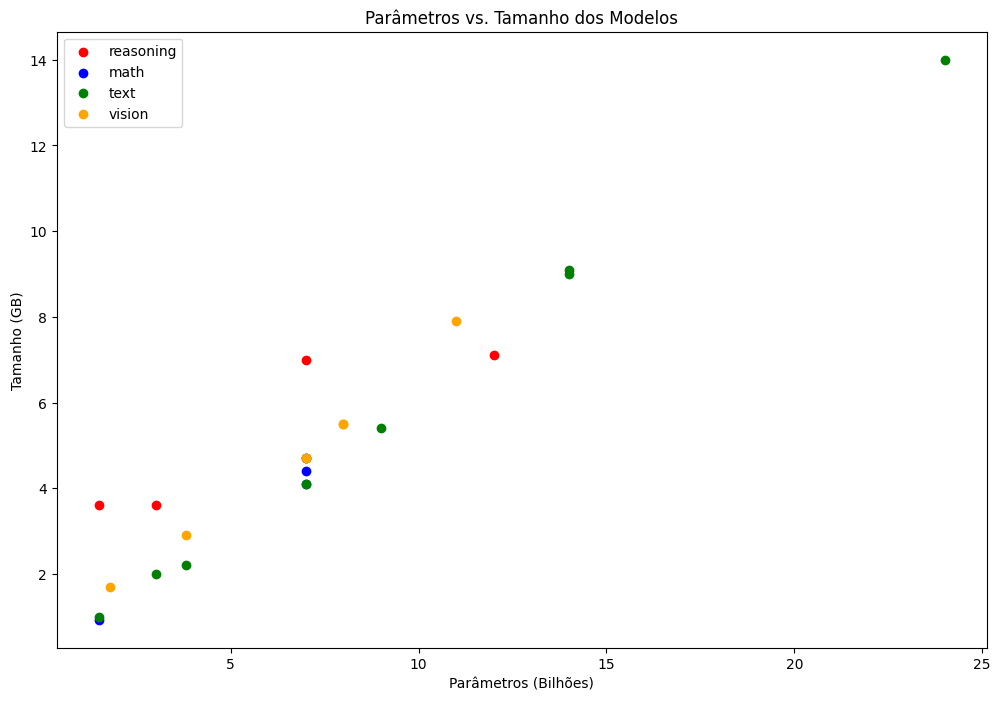

In [2]:
utils.models_info.plot_parameters_x_size()

## 2. Questões de Texto

O primeiro tipo de questões que vamos analisar serão as questões de texto, as quais represetam 63.6% de todas as questões do dataset, para esses modelos, para isso, vamos dividir em 3 grupos para realizarmos os teste. Primeiramente iremos testar modelos com versões de tokens, para entender o quão o tamnho de um memso modelo pode ser impactante para o desempenho do modelo. Depois iremos testar modelos com suporte a reasoning, ou seja modelos mais demoroados, mas que prometem um processamento mais elaborado. Por fim testaremos os demais modelos de apenas entradas de texto.

Para realizarmos esse experimento, selecionamos de forma pseudo-aleatória 100 questões, sendo 25 de cada disciplina, para tentar ser o mais bem distribuído possível.

In [3]:
# Realizamos uma filtragem nas questões para obtermos apenas as questões com apenas texto
text_questions   = list(filter(lambda x : x["type"] == "only-text", questoes))

# Agora seelcionamos de forma pseudo-aleatória as 100 questões, sendo 25 de cada disciplina
example_text_questions  = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", text_questions)), 25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", text_questions)),25))
)

### 2.1 Avaliando o Imapacto do Tamanho do Modelo
Para isso, iremos utilizar o `qwen2.5` nas versões de `14b`, `7b` e `1.5b` pesando respectivamente 9.0GB, 4.7GB e 1.9GB

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,qwen2.5:14b,9.0,100 (100.0%),64,0,36,0,0.640000,01:12,01:12,0.00,0.72,4.78,0.30
1,qwen2.5:7b,4.7,100 (100.0%),64,0,36,0,0.640000,33.26,33.26,0.00,0.33,4.68,0.15
2,qwen2.5:1.5b,1.0,100 (100.0%),42,0,58,0,0.420000,15.78,15.78,0.00,0.16,2.12,0.07
3,TOTAL,14.7,300 (100.0%),170,0,130,0,0.566667,02:01,0.00,ND,0.40,4.78,0.07


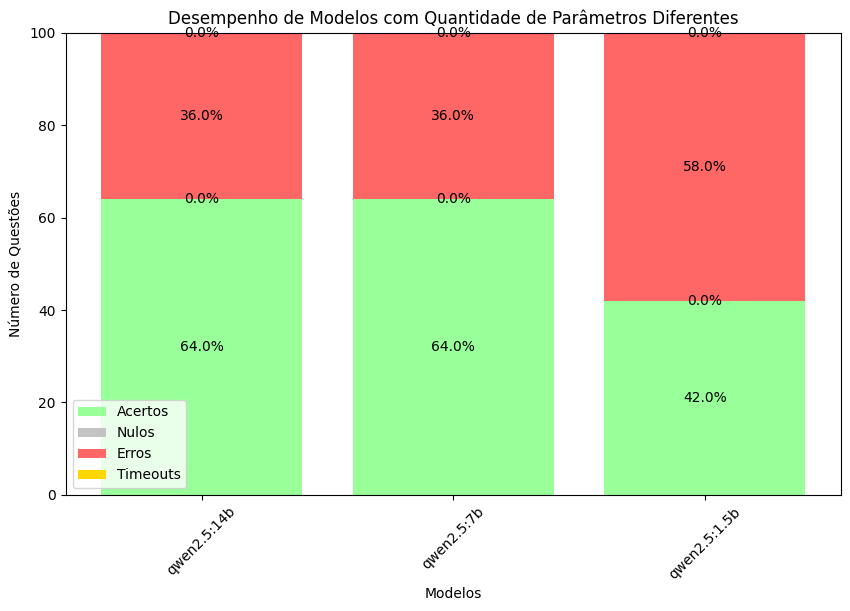

In [4]:
qwen_models = ["qwen2.5:14b", "qwen2.5:7b", "qwen2.5:1.5b"]

test_result = test_models(
    primary_models=qwen_models,
    questions=example_text_questions
)

qwen_table = utils.test_table(
    questions=example_text_questions,
    models=qwen_models
)

clear_output(wait=True)
display(utils.format_test_table(qwen_table))
plots.model_performance(qwen_table, "Desempenho de Modelos com Quantidade de Parâmetros Diferentes")
None

Notamos nesse tetste que embora a versão `14b` possuindo quase o dobro de tamanho do modelo de `7b` teve uma acurácia igual e ainda gastou mais tempo. Porém é importante notar que o menor modelo teve um desempenho abaixo dos demais, acertando 42% das perguntas.

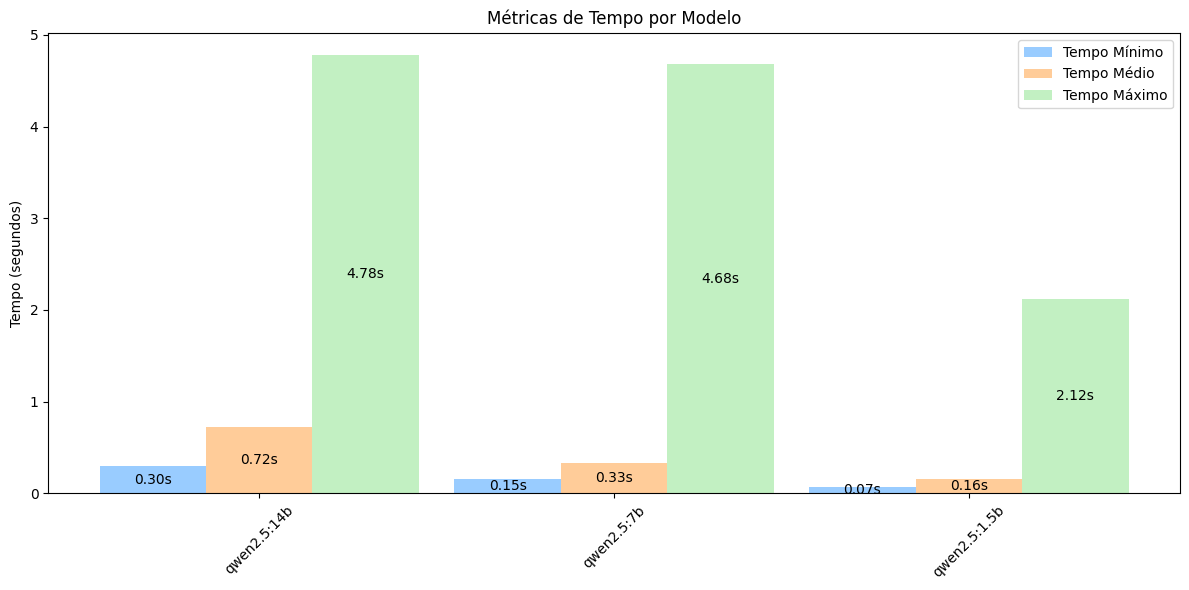

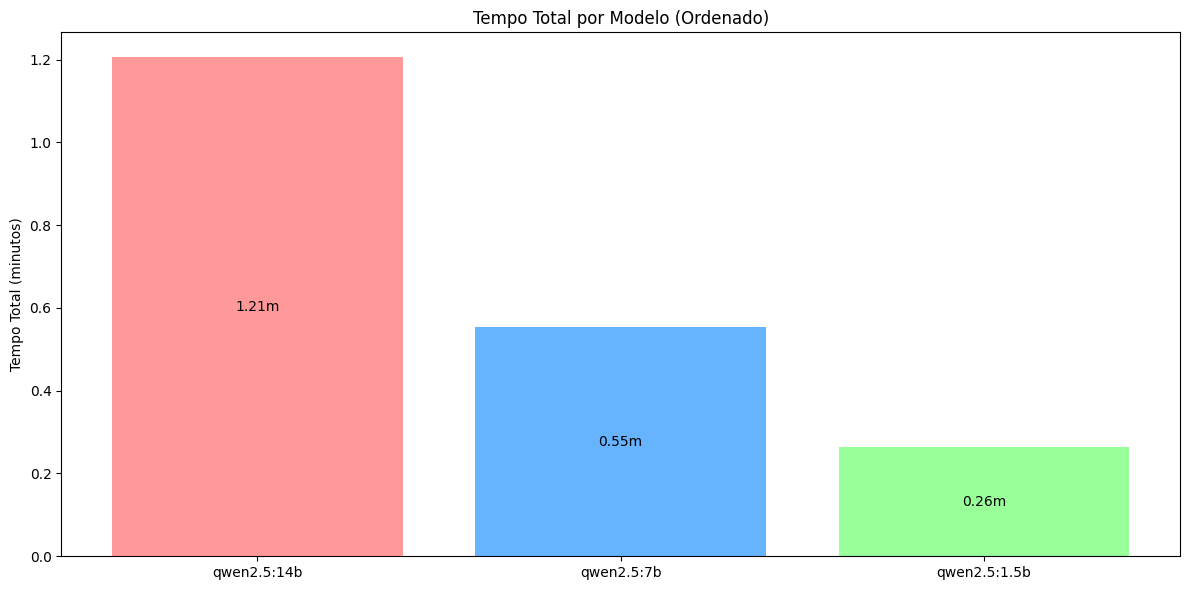

In [5]:
plots.time_metrics(qwen_table)
plots.time_metrics_total(qwen_table)
None

Ao analisar o tempo de cada modelo, notamos que os tempos máximos dos modelos mais robustos tiveram um desempenho similar, porém um modelo com mais parâmetros demorou muito mais tempo na média e no menor caso comparado.

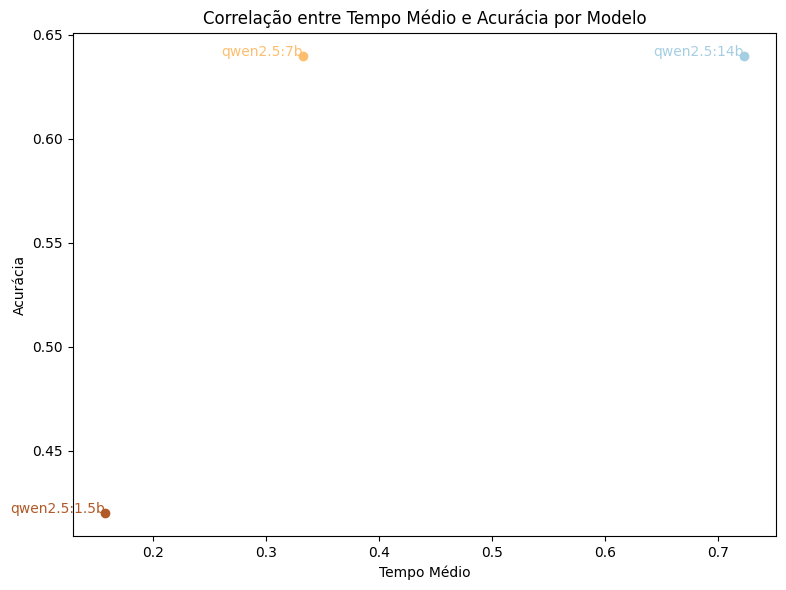

In [6]:
plots.correlation(qwen_table)
None

Ao observar a correlação entre Tempo médio e Acurácia, notamos que do modelo mais leve para o mais pesado aparenta seguir um crescimento linear, poré o modelo intermediário de 7b conseguiu ter a mesma acurácia, com quase a metade do tempo

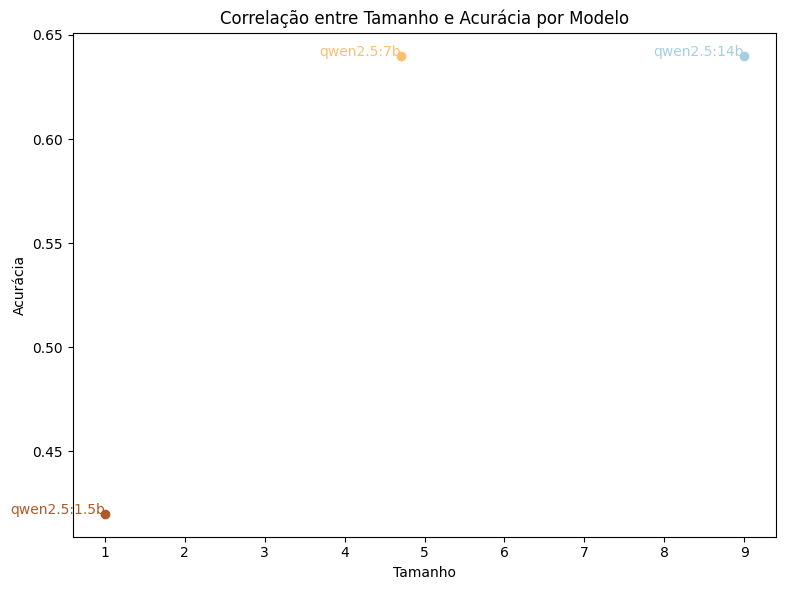

In [7]:
plots.correlation(qwen_table, "Size")
None

O mesmo comportamento pode ser observado na correlação entre o tamanho do modelos.

### 2.2 - Avaliando Modelos de Reasoning
Os modelos de Reasoning, por terem uma camada maior de processamento e raciocínio, é esperado que possuam um desempenho superior, para esses testes iremos utilizar os modelo de []

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,deepseek-r1,7.0,100 (100.0%),65,0,35,0,0.650,32:32,32:32,0.00,19.53,01:52,4.96
1,mistral-nemo,7.1,100 (100.0%),65,0,35,0,0.650,04:34,04:34,0.00,2.75,14.25,0.22
2,openthinker,4.7,100 (100.0%),60,0,40,0,0.600,01:24:44,01:24:44,0.00,50.85,09:02,9.70
3,smallthinker,3.6,100 (100.0%),53,11,25,11,0.530,18:20,40:20,0.00,11.00,27.32,4.87
4,deepscaler,3.6,100 (100.0%),29,0,71,0,0.290,43:28,43:28,0.00,26.08,05:24,3.82
5,TOTAL,26.0,500 (100.0%),272,11,206,11,0.544,03:03:40,22:00,ND,22.04,09:02,0.22


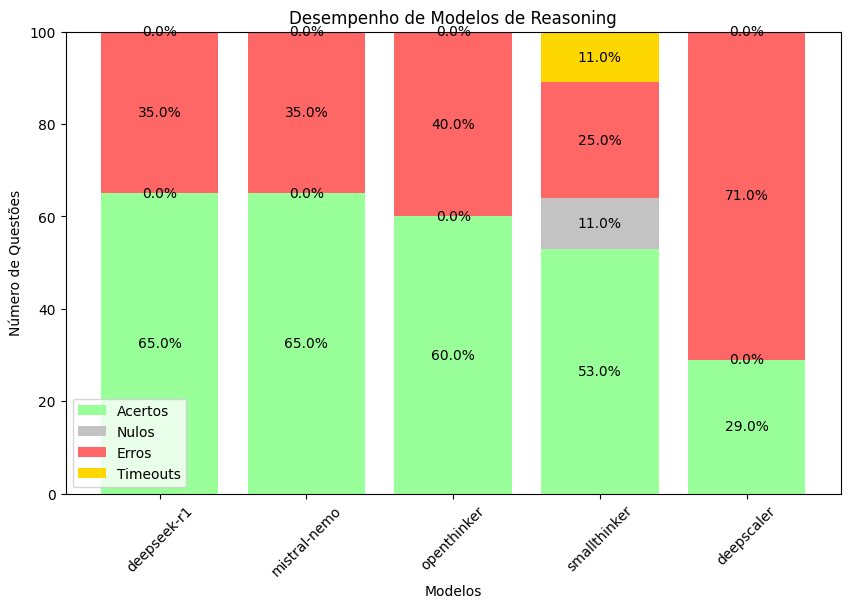

In [8]:
reason_models = ["deepscaler", "deepseek-r1", "mistral-nemo", "openthinker", "smallthinker"]

test_result = test_models(
    primary_models=reason_models,
    questions=example_text_questions,
    timeout = 100
)

reason_table = utils.test_table(
    questions=example_text_questions,
    models=reason_models
    
)

clear_output(wait=True)
display(utils.format_test_table(reason_table))
plots.model_performance(reason_table, "Desempenho de Modelos de Reasoning")
None

Analisando a acurácia do modelos, notamos que o desempenho se mostrou bastante similar aos modelos anteriores, demonstrando que talvez uma algoritmo de reasoning não tenha sido tão eficiente comparado com outros modelos. Outro ponto interessante é que o openthinker teve um desempenho próximo dos outros melhores modelos.

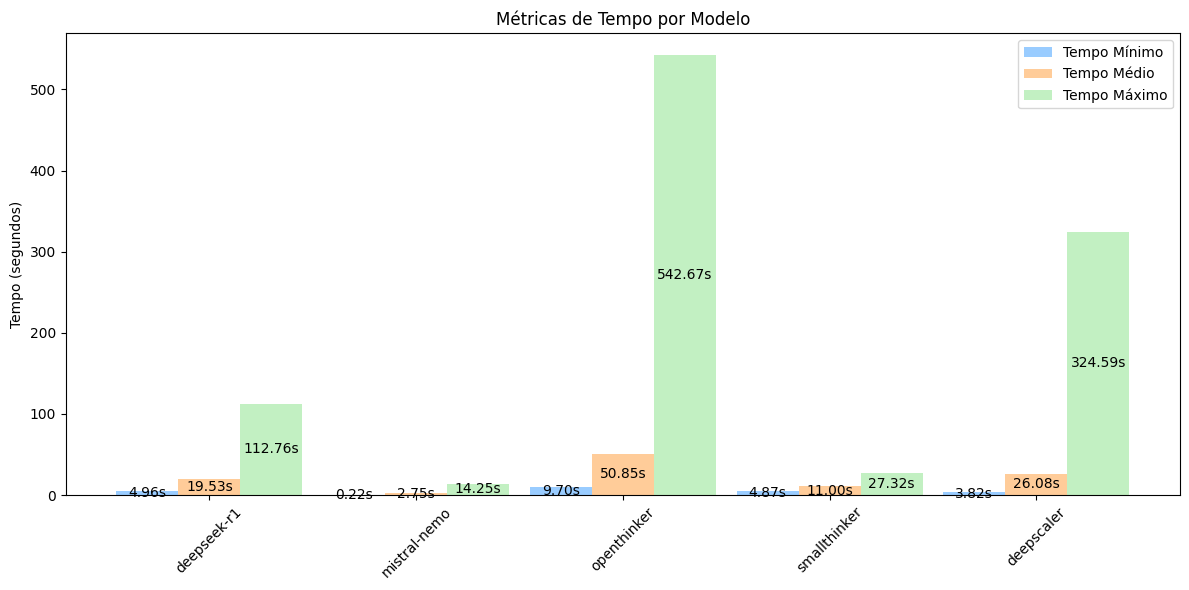

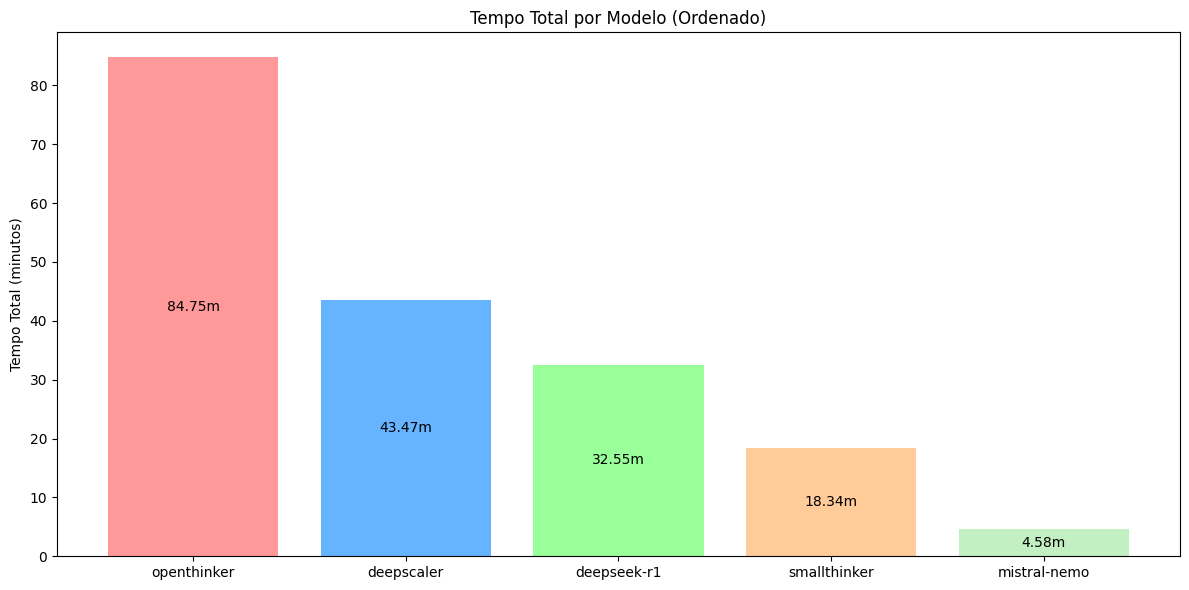

In [9]:
plots.time_metrics(reason_table)
plots.time_metrics_total(reason_table)
None

Porém ao analisarmos o tempo dos modelos, o **ministral-nemo** possuiu um tempo bastante similar aos dois modelos anteriores, porém, nos demais, principamente o openthinker apresentaram tempos muito superiores, chegando a quase 18.5x do modelo com menor tempo, ou seja, tivemos uma acurácia nos melhores casos muito próxima dos modelos anteriores que possuem um tempo significamente menor. É importante, pontuar que os modelos com exceção ao ministral-nemo, tiveram um tempo máximo muito alto, chegado a mais de 500 segundos em um exemplo. 

### 2.3 - Modelos focados em Matemática

Selecionamos alguns modelos focados em matemática como ..., incluindo a variação de modelo de dois desses algoritmos.

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,mathstral,4.1,100 (100.0%),56,0,44,0,0.560000,10:38,10:38,0.00,6.39,23.44,0.25
1,qwen2-math:7b,4.4,100 (100.0%),37,0,63,0,0.370000,40.43,40.43,0.00,0.40,4.43,0.16
2,qwen2-math:1.5b,0.9,100 (100.0%),26,0,74,0,0.260000,04:35,04:35,0.00,2.76,6.40,0.21
3,TOTAL,9.4,300 (100.0%),119,0,181,0,0.396667,15:54,0.00,ND,3.18,23.44,0.16


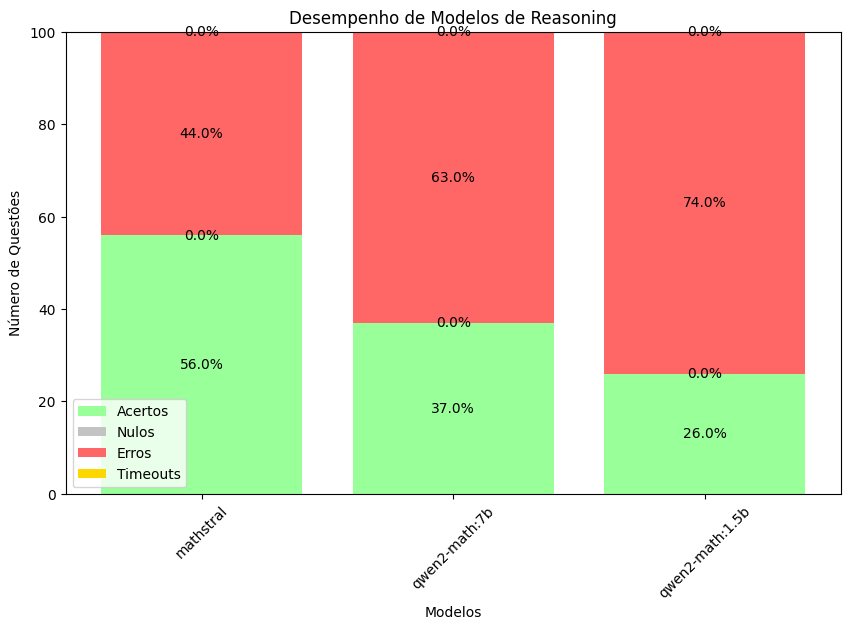

In [10]:
math_models = ["qwen2-math:1.5b", "qwen2-math:7b", "mathstral"]

math_table = utils.test_table(
    questions=example_text_questions,
    models=math_models
)

display(utils.format_test_table(math_table))
plots.model_performance(math_table, "Desempenho de Modelos de Reasoning")
None

A acurácia desses modelos foram inferiores aos anteriores, o que sugere que esses algoritmos voltados para matemática não conseguiram se sair bem nas demais disciplinas. Porém um dado curioso é da baixa diferença entre as variações do qwen2-math, porém o modelos mais curto teve um tempo médio muito superior, porém o modelo mathstral, que tem um tamanho próximo do qwen2-math:7b, demorou quase 10min para concluir os testes.

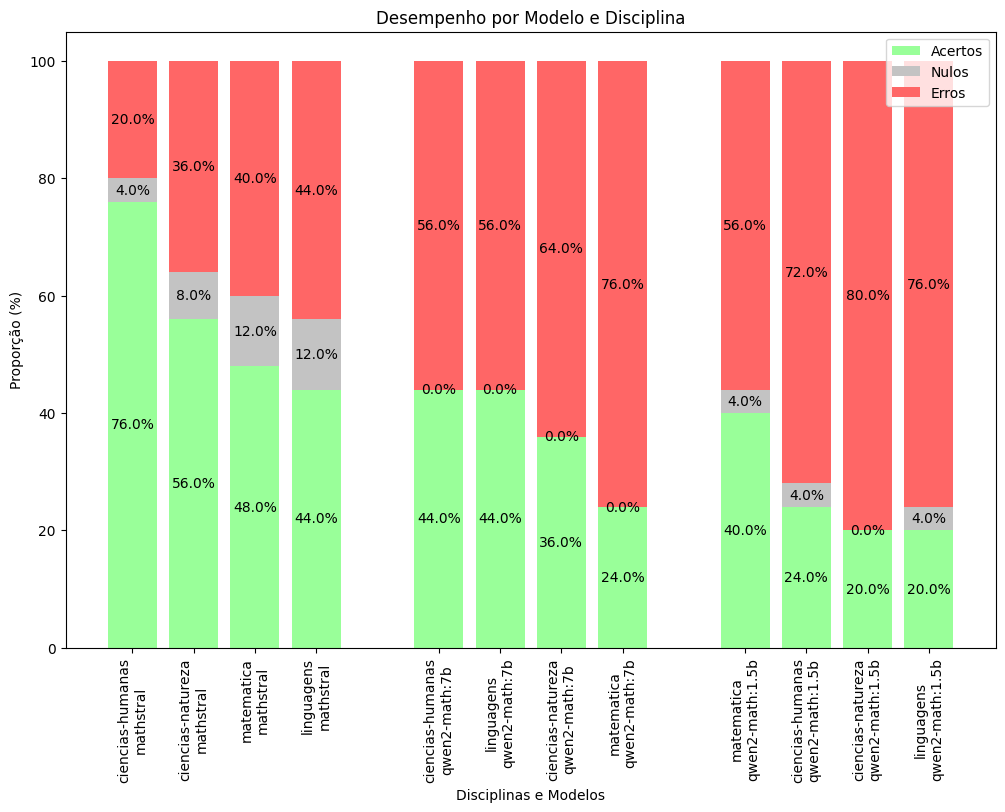

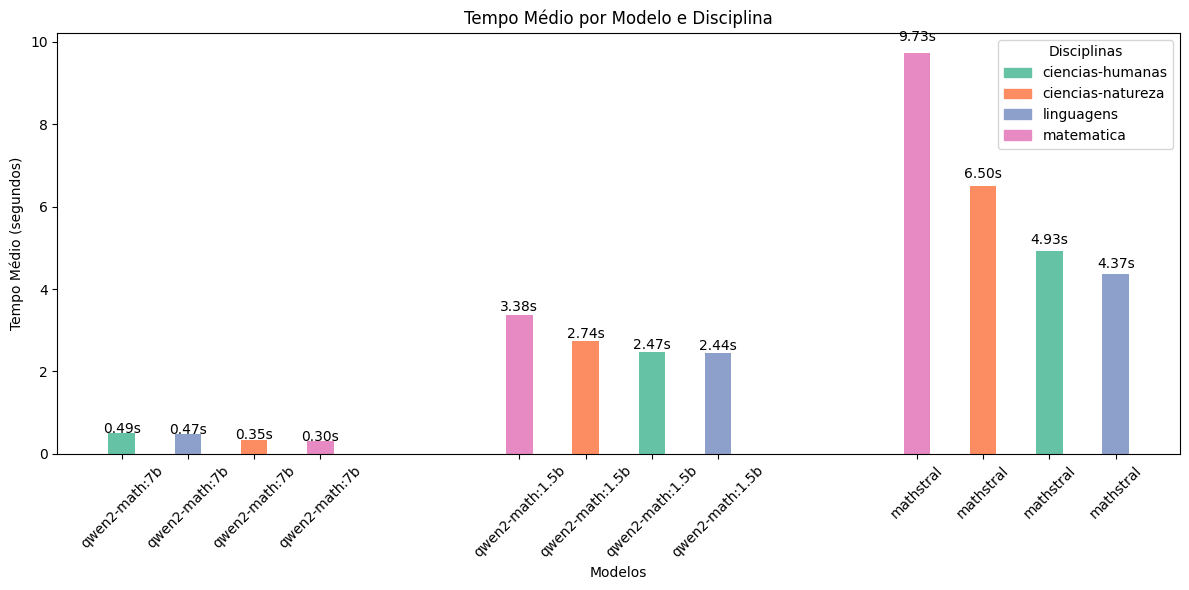

In [11]:
plots.discipline_performance(math_models, example_text_questions,True, True)
plots.discipline_time_performance(math_models, example_text_questions, True)
None

Porém ao anasisarmos o desempennho de cada disciplina por modelo, notamos que não houve uma melhora significativa em questões de matemática como esperamos, o que possuiu um melhor desempenho foi, o surpreendente **qwen2-math:1.5b**, mesmo com uma quantidade muito inferior de parâmetros obteve o melhor resultado, mesmo gastando um pouco mais de tempo que os demais.

### 2.4 - Demais Modelos
Por fim treinamos o restante dos modelos de texto, e um modelo com suporte a viasão, para tentar compreender se algum modelo que possui um foco em vários modias consegue ter um desempenho próximo a um modelo dedicado

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,phi4,9.1,100 (100.0%),86,0,14,0,0.86,12:34,12:34,0.00,7.55,32.99,1.70
1,mistral-small,14.0,100 (100.0%),78,0,22,0,0.78,44:21,44:21,0.00,26.61,04:11,1.02
2,gemma2,5.4,100 (100.0%),68,0,32,0,0.68,58.63,58.63,0.00,0.59,8.83,0.28
3,mistral,4.1,100 (100.0%),51,0,49,0,0.51,01:57,01:57,0.00,1.18,20.85,0.22
4,llava,4.7,100 (100.0%),40,0,60,0,0.40,01:16,01:16,0.00,0.76,10.90,0.18
5,llama3.2,2.0,100 (100.0%),25,0,75,0,0.25,30.14,30.14,0.00,0.30,7.85,0.09
6,phi3.5,2.2,100 (100.0%),16,0,84,0,0.16,13:23,13:23,0.00,8.04,02:07,0.29
7,TOTAL,41.5,700 (100.0%),364,0,336,0,0.52,01:15:02,0.00,ND,6.43,04:11,0.09


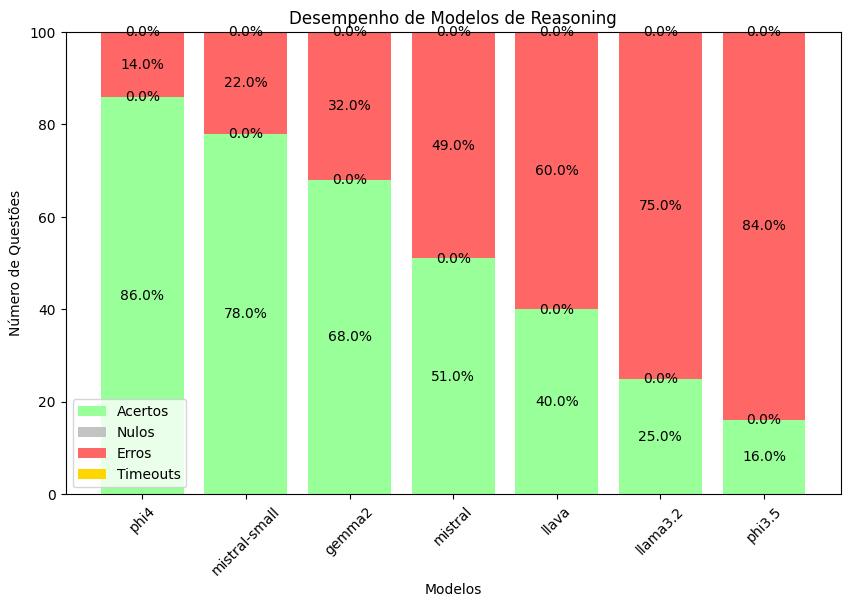

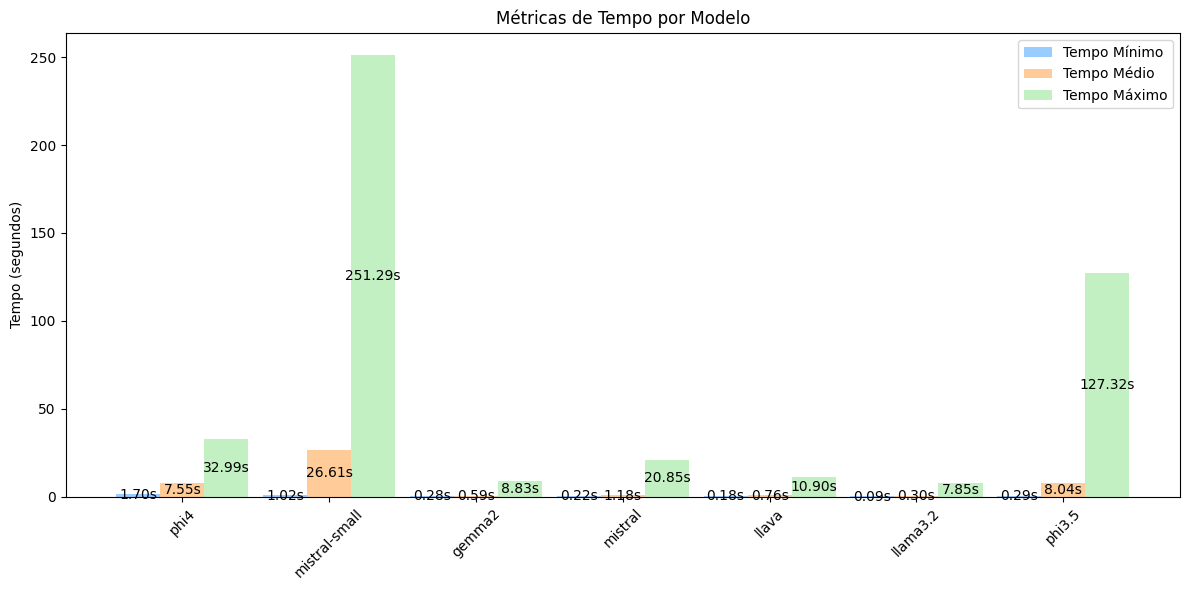

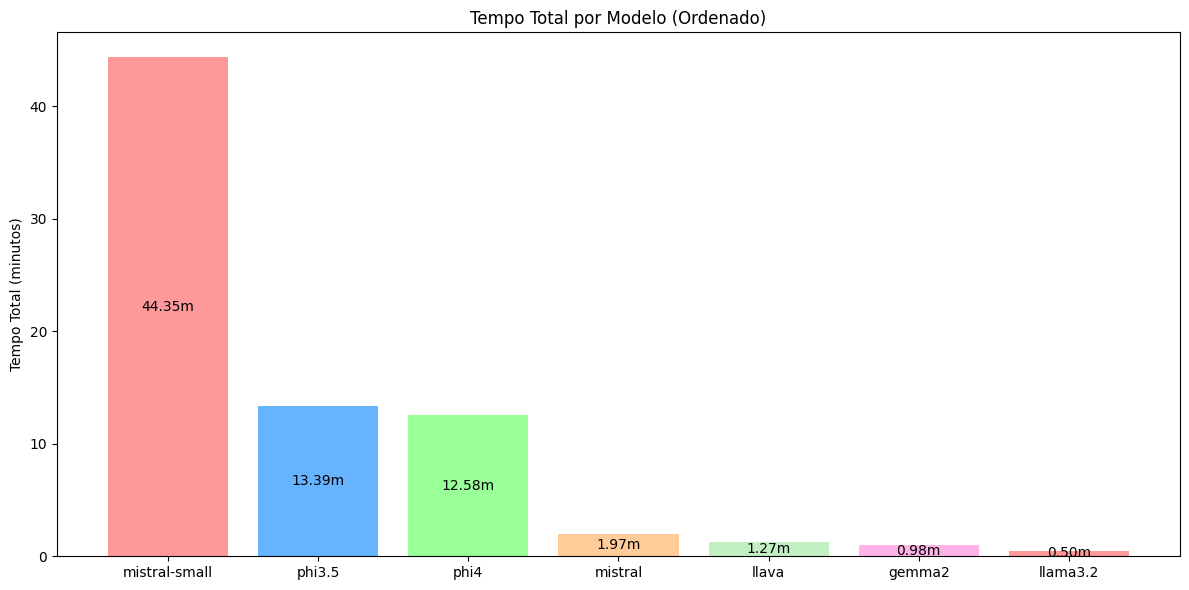

In [12]:
text_models = ["phi4", "phi3.5", "gemma2", "llava", "llama3.2", "mistral", "mistral-small"]

text_table = utils.test_table(
    questions=example_text_questions,
    models=text_models
)

display(utils.format_test_table(text_table))
plots.model_performance(text_table, "Desempenho de Modelos de Reasoning")
plots.time_metrics(text_table)
plots.time_metrics_total(text_table)
None

Nesse resultado tivemos uma ótima surpresa, os modelos **phi4** e **mistral-small** conseguiram uma acurácia acima de 70%, e o **gemma2** não ficou muito pra trás, chegando em 68%, porém o tempo do mistral-small foi muito superior aos demais, levando quase 44min para concluir o teste. Os modelos da Microsoft também tiveram um tempo considerável.

Um desempenho incomum aconteceu com o modelo phi3.5, nas primeiras questões ele conseguiu ter uma boa acurácia, pore´m com o passar do tempo ele começou a responder coisas totalmente distintas do que deveriam ser respondidas, o que impactou significamente no número de questões nulas.

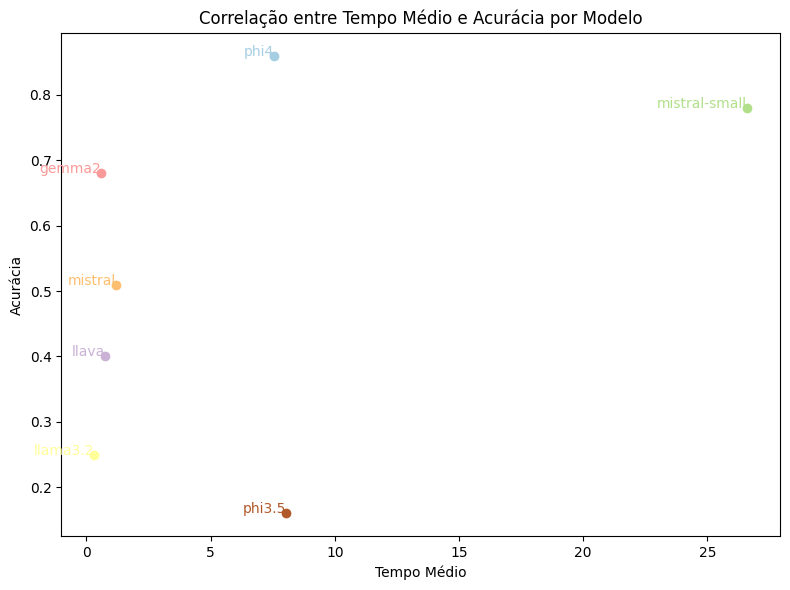

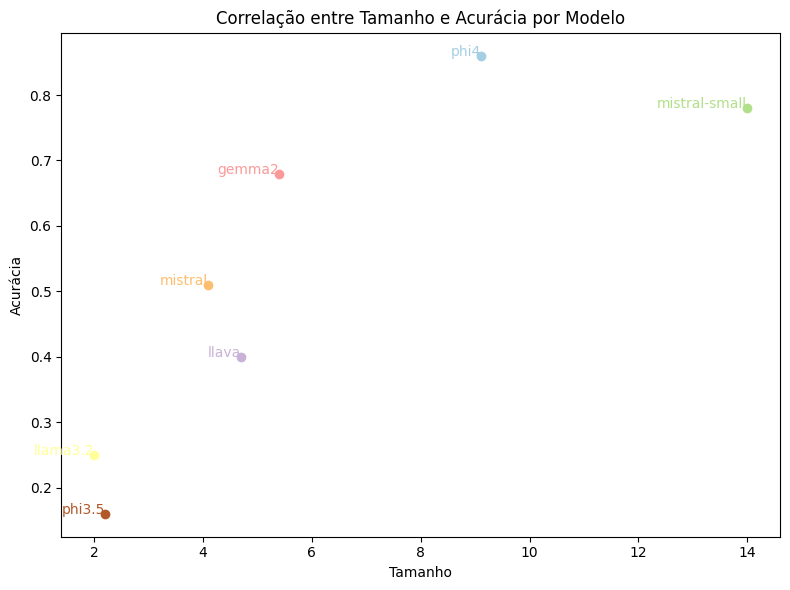

In [13]:
plots.correlation(text_table, "Tavg", "Acc")
plots.correlation(text_table, "Size", "Acc")
None

E utilizando a matriz de correlação, podemos concluir que os dois modelos que mais se destacaram nesse teste foram os de **phi4** e **gemma2**, pois tiveram uma ótima performance sem gastar tanto tempo, e não precisam de uma memória tão grande como o caso do modelo minstral-small, no qual o tempo pode ter sido impactado com a liitação do hardware, pois foi utilizada uma placa de 12GB e VRAM, e o modelo tem um tamanho de 14GB, logo, o modelo não pode ter sido carregado totalmente na VRAM, tendo que ser armazenado também na memória RAM, gastandomais tempo para o carregamento do modelo, impactando assim a velocidade do modelo.

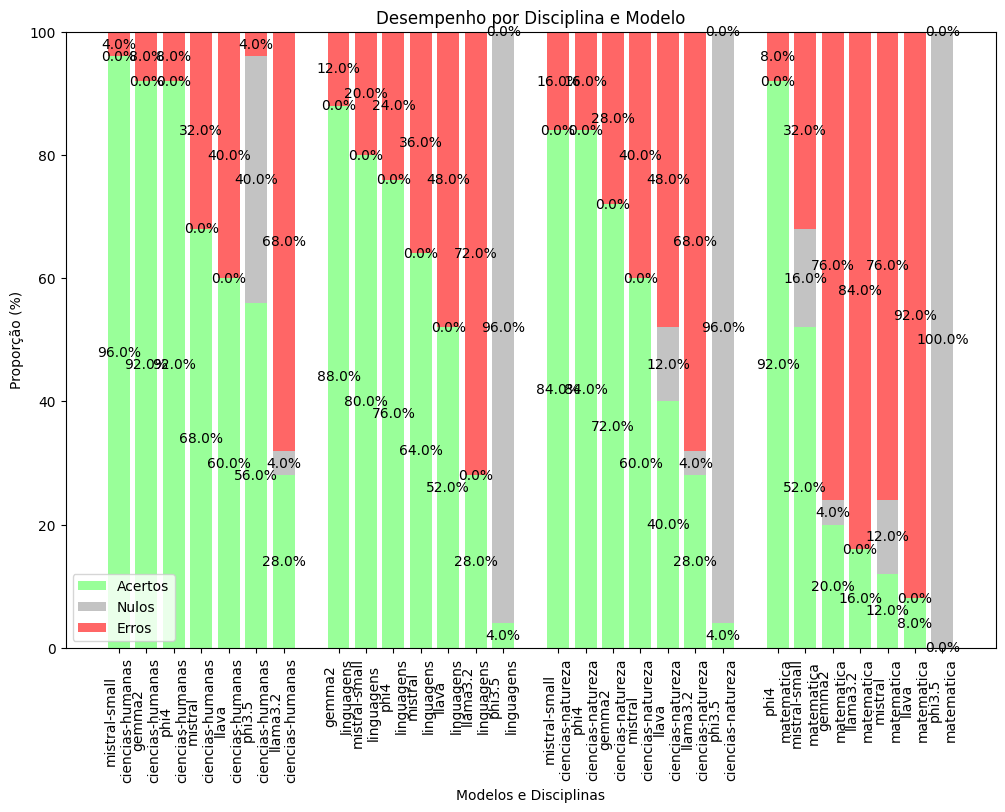

In [14]:
plots.discipline_performance(text_models, example_text_questions, normalize=True)
None

E no desempenho por disciplina, curiosamente o modelos de **phi4** e **mistral-small** conseguiram um desempenho superior em matemática do que os modelos focados em matemática, com o **phi4** atingindo impressionantes 92% de precisão, e um desempenho constante em todas as outras disciplinas, o que sugere sua alta taxa de desempenho comparado com os demais.

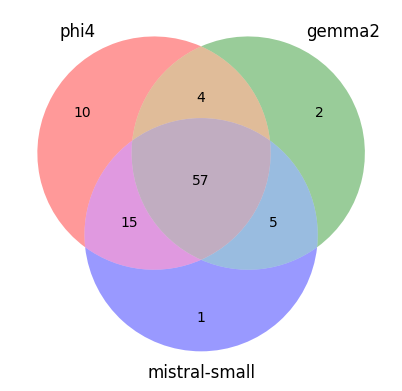

In [15]:
plots.venn(example_text_questions, 'phi4', 'gemma2', 'mistral-small')

E ao observarmos o Diagrama de Venn, notamos que das 14 questões que o phi4 não conseguiu acertar, os outros 2 melhores modelos conseguiram acertar 8.

### 2.5 Resultado por Disciplinas

In [16]:
all_text_models = qwen_models + math_models + reason_models + text_models
text_table = utils.tabela_geral(example_text_questions, all_text_models)
table_disciplinas = utils.analisar_tabela(text_table, 'discipline')
table_disciplinas

,discipline,Total,OK,Null,Err,Tout,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,ciencias-humanas,450.0,293.0,13.0,144.0,0.0,2216.421111,0.0,2216.421111,4.925380,127.324694,0.082505
1,ciencias-natureza,450.0,246.0,39.0,165.0,0.0,3363.931982,0.0,3363.931982,7.475404,173.496423,0.080599
2,linguagens,450.0,245.0,35.0,170.0,4.0,2286.582571,0.0,2286.582571,5.081295,77.246623,0.000000
3,matematica,450.0,141.0,68.0,241.0,7.0,8732.506938,0.0,8732.506938,19.405571,542.666862,0.000000


Observando o desemprenho individual de cada disciplina em todos os modelosde texto, nota-se que Matemática é a principal dificuldade dos modelos, uma vez que o seu tempo de execução é superior aos demais somados, além de que a Acurácia de Todos os modelos chegou a 31.33%, enquanto os outros modelos conseguiram uma acurácia entre 54.44% a 65.11%

#### 2.5.1 Matemática

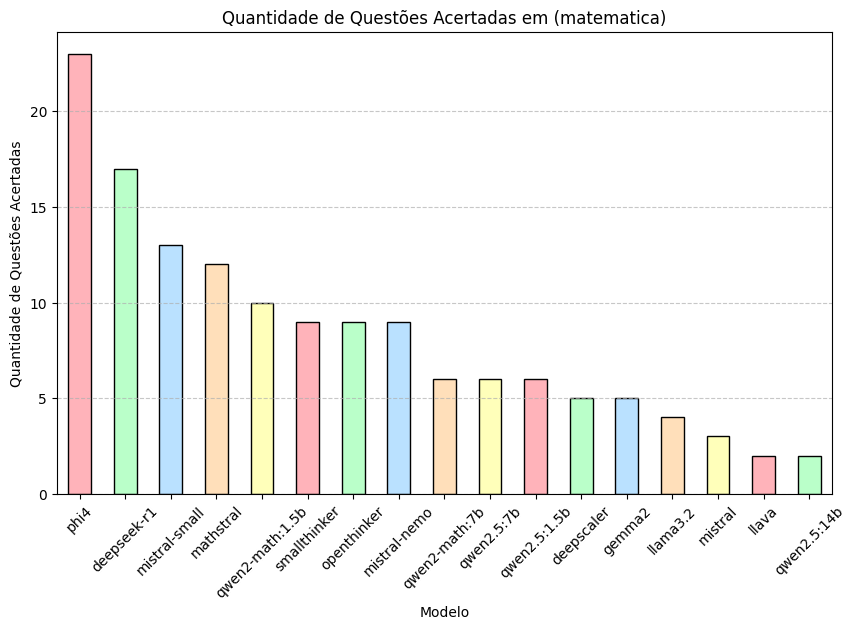

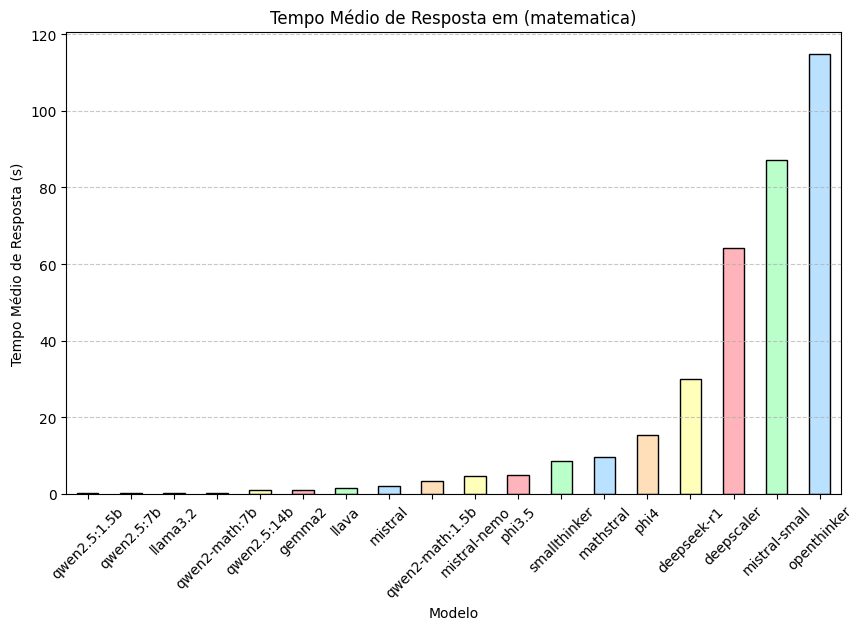

In [17]:
plots.discipline_models(text_table, 'matematica', 'acc')
plots.discipline_models(text_table, 'matematica', 'time')

Nota-se que a escalada de tempo é muito maior do que a de resultados, e geralmento os modelos com maior tempo de execução foram os que sairam melotr, porém, nem tanto tempo significa acurácia, pois o modelo com maior acurácia teve um tempo bem menor do que o tempo do modelo mais demorado, que teve um desempenho médio. É importante notar, também, que apenas 4 dos modelos testados conseguiram acertar mais da metade das questões.

#### 2.5.2 Linguagens

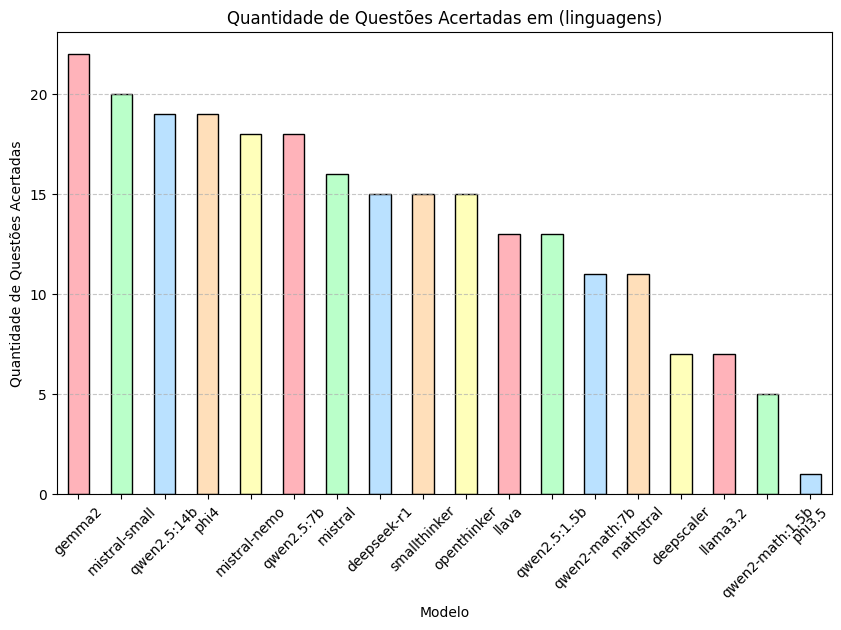

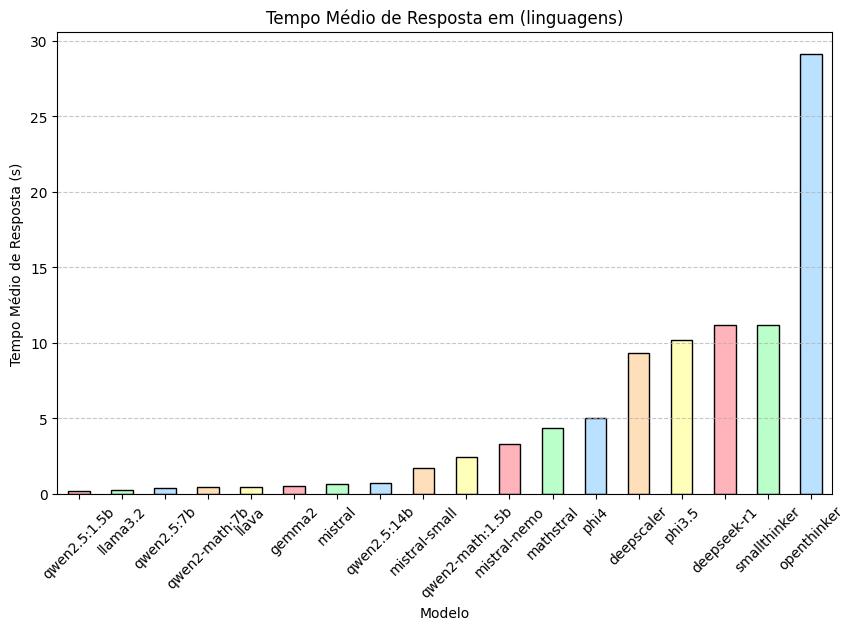

In [18]:
plots.discipline_models(text_table, 'linguagens', 'acc')
plots.discipline_models(text_table, 'linguagens', 'time')

Nesse cenário nota-se métricas muito melhores, com a maioria dos modelos conseguindo acertar 15 ou mais questões, e com um tempo de resposta muito inferior ao de matemática, com apenas 5 modelos tendo tempo médio superior a 5 segundos.

#### 2.5.3 Ciências Humanas

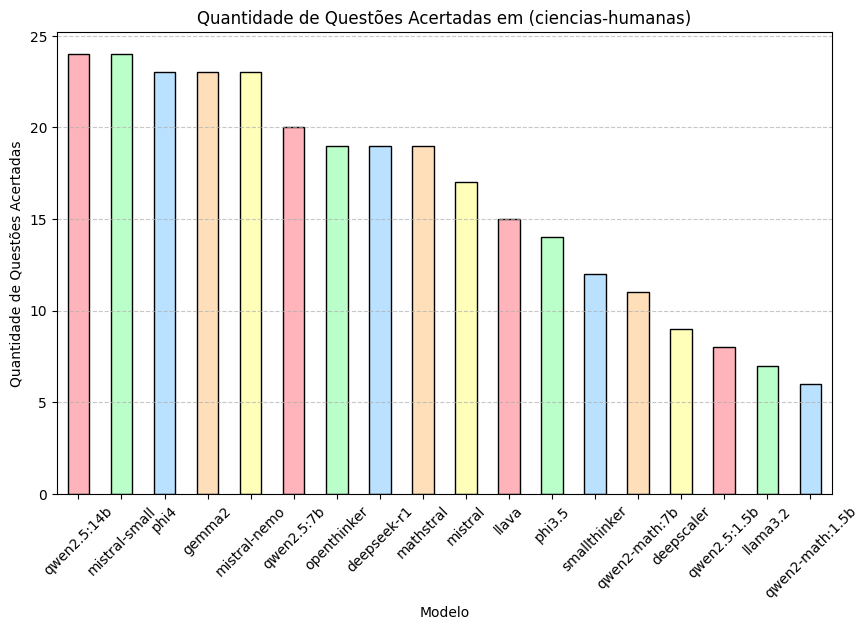

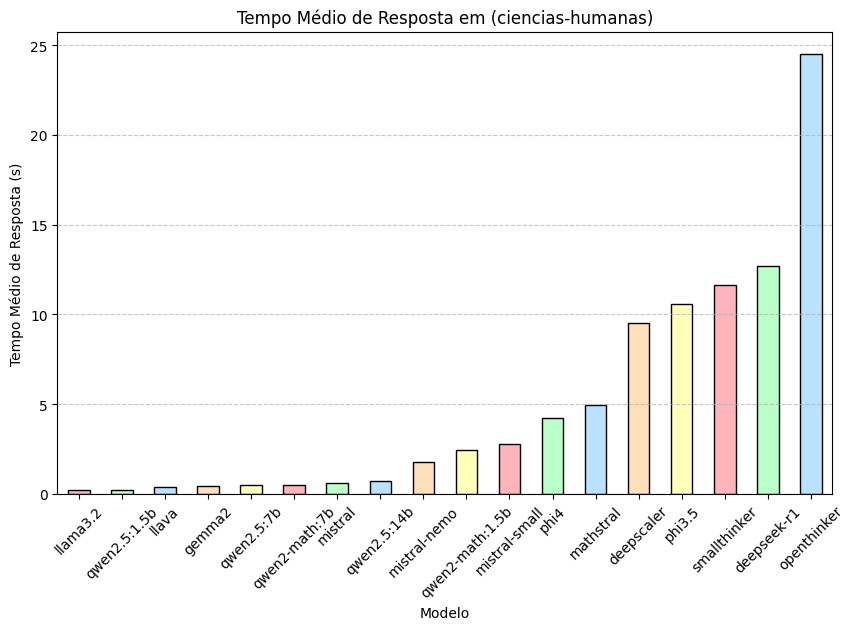

In [19]:
plots.discipline_models(text_table, 'ciencias-humanas', 'acc')
plots.discipline_models(text_table, 'ciencias-humanas', 'time')

Aqui temos um cenário muito similar ao de linguagens, porém com uma índice de acerto um pouco maior. Esse fato se deve muito provavelmente a que algumas questões de ciências humanas são mais objetivas do que interpretativa, como por exemplo, para identificar o pensamento de algum filósofo.

#### 2.5.4 Ciências da Natureza

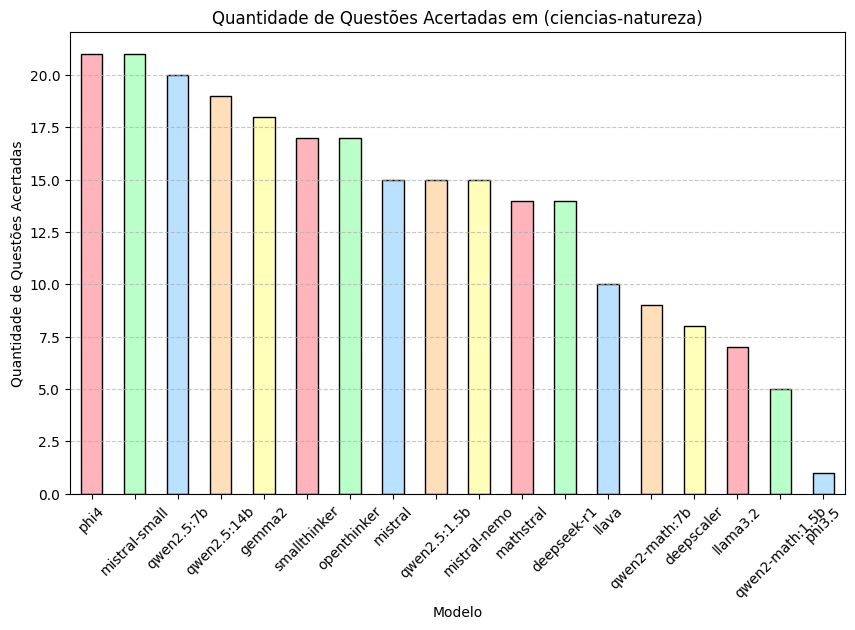

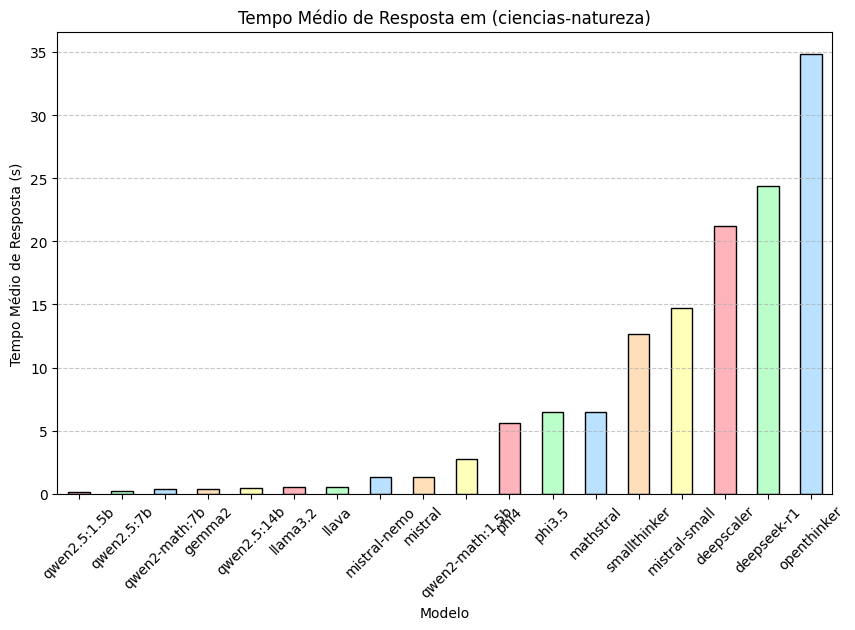

In [20]:
plots.discipline_models(text_table, 'ciencias-natureza', 'acc')
plots.discipline_models(text_table, 'ciencias-natureza', 'time')

Por fim, nas disciplinas de ciências na natureza, notamos o mesmo desemprenho de ciências humanas, porém com um fator de escala exponencial inferior (entre os modelos), e com um tempo médio um pouco superior.

### 2.6 Resultados por Questões

In [21]:
table_question = utils.analisar_tabela(text_table, 'question')
table_question = table_question[table_question['Total'] > 10]

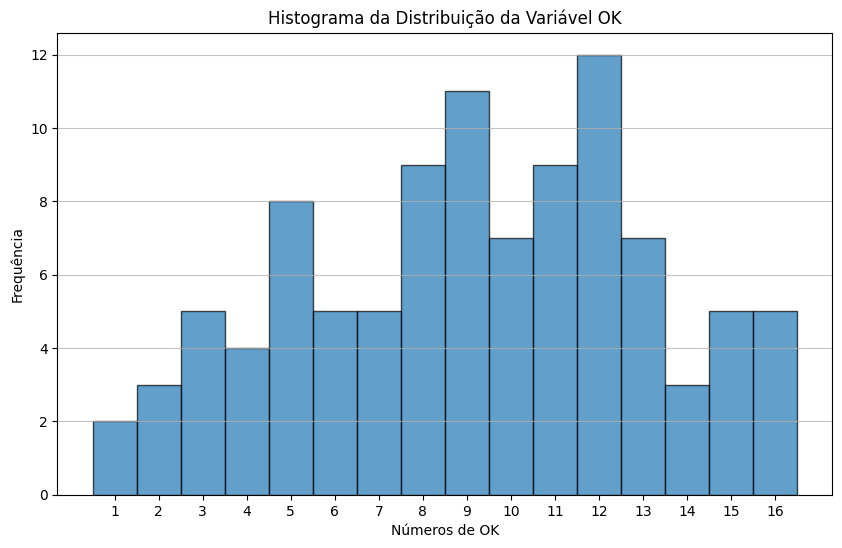

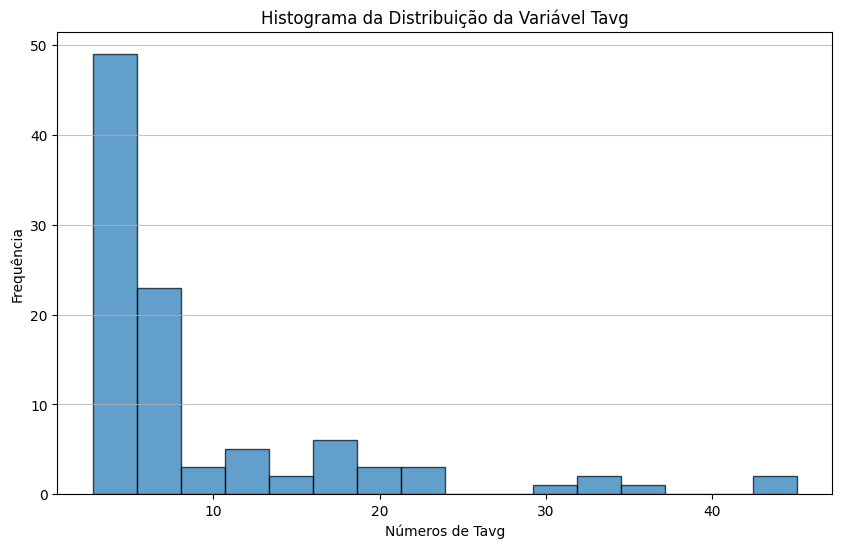

,OK,Tavg
count,100.000000,100.000000
mean,9.160000,9.322356
std,3.915058,8.735102
min,1.000000,2.738627
25%,6.000000,4.309601
50%,9.000000,5.408893
75%,12.000000,10.669667
max,16.000000,45.102289


(np.int64(0), np.int64(5))

In [22]:
table_question = utils.analisar_tabela(text_table, 'question')
table_question = table_question[table_question['Total'] > 10]
plots.histogram(table_question, 'OK', 100)
plots.histogram(table_question, 'Tavg', 30)


display(table_question[['OK', 'Tavg']].describe())

(table_question['OK'] == 0.0).sum(), (table_question['OK'] == 16.0).sum()

Por fim, esta é a distribuição de questões corretas, todas as questões tevieram ao menos algum modelo que conseguiram acertar, e a questão mais acertada teve 5 acertos, a média de acerto é de 8.73.

Observando a perpectiva temporal, a distribuição de tempo médio por questão se concentra bastante no primeiro terço da distribuição, tendo 75% de toda a distribuição apenas em 11.3 segundos

#### 2.6.1 Questões mais difíceis

As duas questões que tiveram apenas 1 acerto foram uma de Linguagens e outra de Ciências da Natureza, respectivamente dos anos de 2013 e 2018.

In [23]:
(table_question[table_question['OK'] == 1.0])

,question,Total,OK,Null,Err,Tout,Ttot,TTout,Tle,Tavg,Tmax,Tmin
98,2013123,18.0,1.0,1.0,16.0,0.0,78.059693,0.0,78.059693,4.336650,17.146971,0.244754
99,2018134,18.0,1.0,2.0,15.0,0.0,96.888755,0.0,96.888755,5.382709,28.602754,0.095900


##### 2.6.1.1 Questão 2013123 - Linguagens

**Para Carr, internet atua no comércio da distração**

_Autor de “A Geração Superficial” analisa a influência da tecnologia na mente_

O jornalista americano Nicholas Carr acredita que a internet não estimula a inteligência de ninguém. O autor explica descobertas científicas sobre o funcionamento do cérebro humano e teoriza sobre a influência da internet em nossa forma de pensar.  
Para ele, a rede torna o raciocínio de quem navega mais raso, além de fragmentar a atenção de seus usuários.  
Mais: Carr afirma que há empresas obtendo lucro com a recente fragilidade de nossa atenção. “Quanto mais tempo passamos _on-line_ e quanto mais rápido passamos de uma informação para a outra, mais dinheiro as empresas de internet fazem”, avalia.  
“Essas empresas estão no comércio da distração e são _experts_ em nos manter cada vez mais famintos por informação fragmentada em partes pequenas. É claro que elas têm interesse em nos estimular e tirar vantagem da nossa compulsão por tecnologia.”

ROXO, E. **Folha de S. Paulo**, 18 fev. 2012 (adaptado).

(A) : Mantém os usuários cada vez menos preocupados com a qualidade da informação.

(B) : Torna o raciocínio de quem navega mais raso, além de fragmentar a atenção de seus usuários.

(C) : Desestimula a inteligência, de acordo com descobertas científicas sobre o cérebro.

(D) : Influencia nossa forma de pensar com a superficialidade dos meios eletrônicos.

(E) : Garante a empresas a obtenção de mais lucro com a recente fragilidade de nossa atenção.

| **Resposta:** (E)

#### 2.6.2 Questões mais Fáceis

Por fim, tivermos 5 questões com mais respostas corretas, das quais, não houve nenhuma de matemática, porém, em Linguagens tivemos a questão de id **2011109**, em Humanas tivemos as questões **2021090, 2010033, 2023050**, e em Ciências da Natureza tivemos a questão **2021097**. Abaixo demostraremos um exemplo de cada uma dessas disciplinas.

In [24]:
(table_question[table_question['OK'] == 16.0])

,question,Total,OK,Null,Err,Tout,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,2021097,18.0,16.0,1.0,1.0,0.0,61.370458,0.0,61.370458,3.409470,18.385131,0.092390
1,2021090,18.0,16.0,0.0,2.0,0.0,59.451560,0.0,59.451560,3.302864,10.569474,0.188483
2,2011109,18.0,16.0,1.0,1.0,0.0,84.691351,0.0,84.691351,4.705075,21.555299,0.112088
3,2010033,18.0,16.0,0.0,2.0,0.0,179.195760,0.0,179.195760,9.955320,127.324694,0.108280
4,2023050,18.0,16.0,1.0,1.0,0.0,60.800225,0.0,60.800225,3.377790,13.952859,0.107462


##### 2.6.2.1 Questão mais fácil Linguagens

O tema da velhice foi objeto de estudo de brilhantes filósofos ao longo dos tempos. Um dos melhores livros sobre o assunto foi escrito pelo pensador e orador romano Cícero: _A Arte do Envelhecimento_. Cícero nota, primeiramente, que todas as idades têm seus encantos e suas dificuldades. E depois aponta para um paradoxo da humanidade. Todos sonhamos ter uma vida longa, o que significa viver muitos anos. Quando realizamos a meta, em vez de celebrar o feito, nos atiramos a um estado de melancolia e amargura. Ler as palavras de Cícero sobre envelhecimento pode ajudar a aceitar melhor a passagem do tempo.

NOGUEIRA, P. Saúde & Bem-Estar Antienvelhecimento. **Época**. 28 abr. 2008.

(A) : Esclarecer que a velhice é inevitável.

(B) : Contar fatos sobre a arte de envelhecer.

(C) : Defender a ideia de que a velhice é desagradável.

(D) : Influenciar o leitor para que lute contra o envelhecimento.

(E) : Mostrar às pessoas que é possível aceitar, sem angústia, o envelhecimento.

| Resposta: E

##### 2.6.2.1 Questão mais fácil Humanas

EIGENHEER, E. M. **Lixo:** a limpeza urbana através dos tempos. Porto Alegre: Gráfica Palloti, 2009.

**Texto II**  
A repugnante tarefa de carregar lixo e os dejetos da casa para as praças e praias era geralmente destinada ao único escravo da família ou ao de menor status ou valor. Todas as noites, depois das dez horas, os escravos conhecidos popularmente como “tigres” levavam tubos ou barris de excremento e lixo sobre a cabeça pelas ruas do Rio.

KARACH, M. C. **A vida dos escravos no Rio de Janeiro, 1808-1850.** Rio de Janeiro: Cia. das letras, 2000.
(A) : Valorização do trabalho braçal.

(B) : Reiteração das hierarquias sociais.

(C) : Sacralização das atividades laborais.

(D) : Superação das exclusões econômicas.

(E) : Ressignificação das heranças religiosas.

| Resposta: B

##### 2.6.2.2 Questão mais fácil Natureza

EIGENHEER, E. M. **Lixo:** a limpeza urbana através dos tempos. Porto Alegre: Gráfica Palloti, 2009.

**Texto II**  
A repugnante tarefa de carregar lixo e os dejetos da casa para as praças e praias era geralmente destinada ao único escravo da família ou ao de menor status ou valor. Todas as noites, depois das dez horas, os escravos conhecidos popularmente como “tigres” levavam tubos ou barris de excremento e lixo sobre a cabeça pelas ruas do Rio.

KARACH, M. C. **A vida dos escravos no Rio de Janeiro, 1808-1850.** Rio de Janeiro: Cia. das letras, 2000.
(A) : Valorização do trabalho braçal.

(B) : Reiteração das hierarquias sociais.

(C) : Sacralização das atividades laborais.

(D) : Superação das exclusões econômicas.

(E) : Ressignificação das heranças religiosas.

| Resposta: B

##### 2.6.2.3

A simples atitude de não jogar direto no lixo ou no ralo da pia o óleo de cozinha usado pode contribuir para a redução da poluição ambiental. Mas o que fazer com o óleo vegetal que não será mais usado? Não existe um modelo ideal de descarte, mas uma alternativa simples tem sido reaproveitá-lo para fazer sabão. Para isso, são necessários, além do próprio óleo, água e soda cáustica.

LOBO, I. **Sabão feito com óleo de cozinha**. Disponível em: http://pga.pgr.mpf.gov.br. Acesso em: 29 fev. 2012 (adaptado).
(A) : Redução.

(B) : Epoxidação.

(C) : Substituição.

(D) : Esterificação.

(E) : Saponificação.

| Resposta: E

## 3. Questões com Imagens no Contexto

Um grande desafio para as LLM é a interpretação de dados fora do escorpo textual, como por exemplo imagens, mesmo existindo alguns recursos de visão ocupacional, a complexidade de algumas imagens são muito altas, e alinhados com o o desafio de responder questões de prova, nosso objetivo e ainda maior.

O primeiro passo de nosso desafio é analisar as questões que possuem imagens em sua contextualização, porém as respostas estão de forma textual. Esse desafio possui o nível mais baixo entre os de imagens, pois algumas questões conseguem ser respondidas sem a imagem.

### 3.1 Testando Modelos de Visão

Primeiramente iremos testar com alguns modelos voltados para visão computacional, na etapa anterior, chegamos a utilizar o **llava** juntamente com outros modelos, porém tivemos um desempenho bem inferior aos demais modelos testados. 

E para esse teste, iremos utilizar 6 modelos, são eles: **minicpm-v**, **moondream**, o já mencionado **llava**, e mais 2 **fine-tunning** desse modelos, os **llava-phi3**, **llava-llama3**, modelo o qual um mais recente também possui uma variação de visão, o **llama3.2-vision**. Na criação desses testes, esses são os modelos de visão computacional mais recentees no Ollama, mesmo já havendo o **llama3.3**, não há uma variação que possua visão computacional.

Selecionamos todas as questões das provas que possuem essa formatação para esse teste, no total, 795 questões.

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision,7.9,792 (99.6%),283,0,509,0,0.357323,02:48:39,02:48:39,38.33,12.78,03:53,0.64
1,minicpm-v,5.5,794 (99.9%),233,0,561,0,0.293451,24:16,24:16,1.83,1.83,14.82,0.30
2,llava-phi3,2.9,795 (100.0%),182,0,613,0,0.228931,14:51,14:51,0.00,1.12,20.50,0.18
3,llava,4.7,795 (100.0%),154,0,641,0,0.193711,20:49,20:49,0.00,1.57,19.91,0.28
4,llava-llama3,5.5,795 (100.0%),91,0,704,0,0.114465,10:08,10:08,0.00,0.77,6.72,0.22
5,moondream,1.7,795 (100.0%),8,0,787,0,0.010063,04:57,04:57,0.00,0.37,4.51,0.10
6,TOTAL,28.2,4766 (99.9%),951,0,3815,0,0.199538,04:03:43,0.00,ND,3.07,03:53,0.10


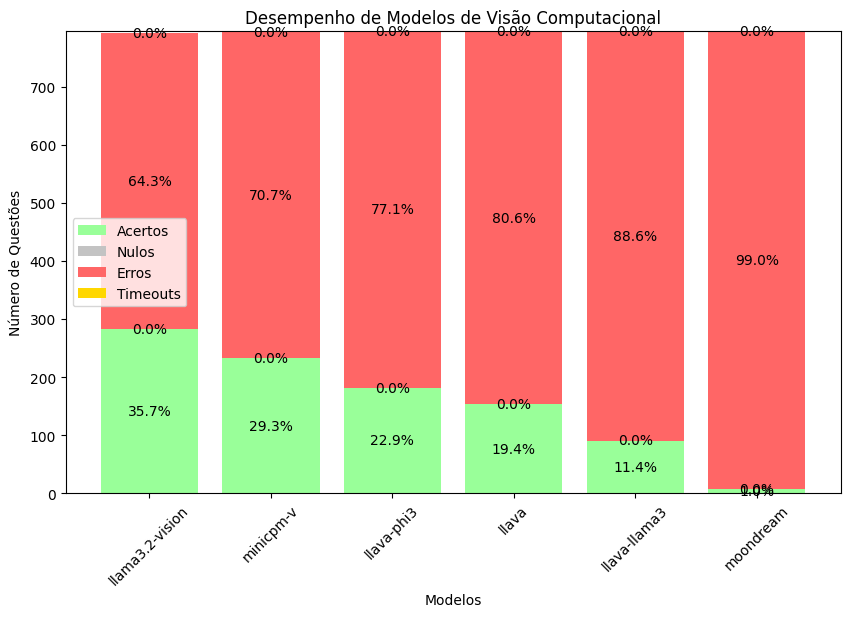

In [25]:
visions_models = ["llava", "llama3.2-vision", "llava-llama3", "minicpm-v","moondream", "llava-phi3"]

context_questions = list(filter(lambda x : x["type"] == "context-image", questoes))

# test_result_context_vision = test_models(
#     primary_models= visions_models,
#     questions = context_questions,
# )

vision_models_test_table = utils.test_table(
    models=visions_models,
    questions=context_questions
)

clear_output(wait=True)
display(utils.format_test_table(vision_models_test_table))
plots.model_performance(vision_models_test_table, "Desempenho de Modelos de Visão Computacional")
None

Como esperado, os resultados dos testes com imagens forma muito abaixo do esperado, com um modelo conseguindo acertar apenas 8 questões, e o modelo com maior acurácia conseguiu apenas 35.7% de acurácia. O **lava** que verificamos na etapa anterior reduziu metade de sua acurácia, chegando a apenas 19.4%, em contraste aos 40% do teste anterior, número esse que é superior ao melhor modelo de visão nesse teste.

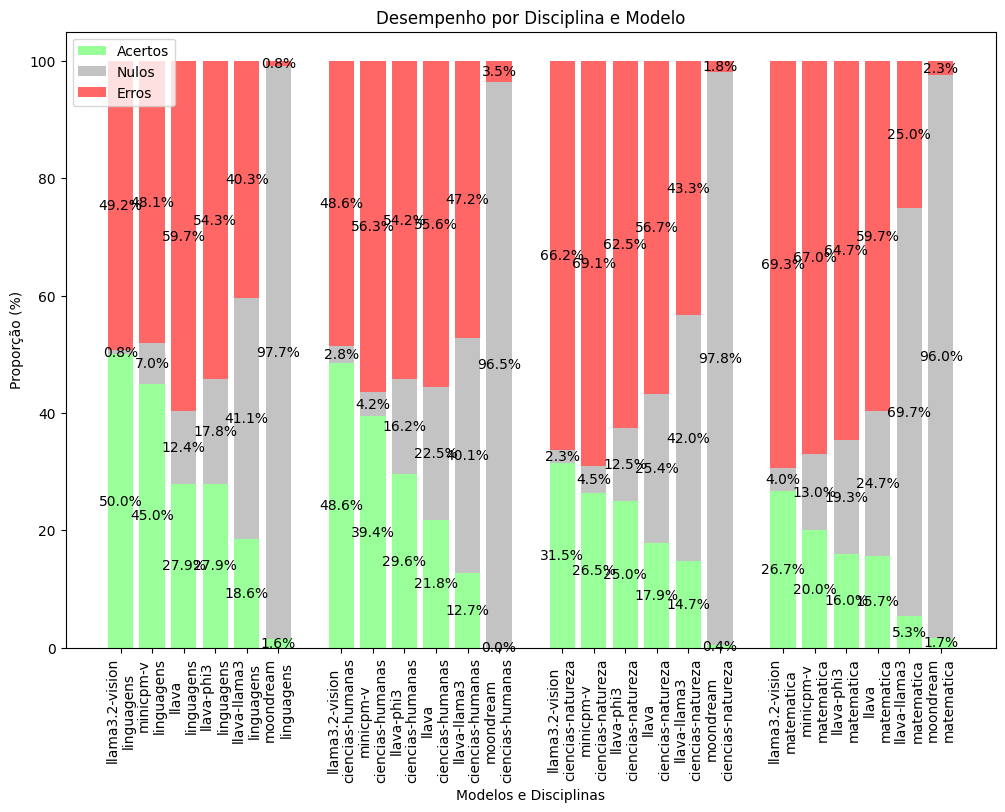

In [26]:
plots.discipline_performance(visions_models, context_questions, normalize=True)
None

Observando o desempenho por disciplina, é como se o desempenho fosse reduzido pela metade em comparação com as questões de apenas texto, porém a discrepância das disciplinas forma bem inferiores à discrepância anterior, uma vez que houve uma dificuldade em todas as questões.

### 3.2 Mesclando Modelos

Uma ideia que tivemos é tentar juntar dois modelos para tentarmos ter uma acurácia melhor, para isso nós selecionamos os melhores modelos que tivemos na etapa 2, e juntamos com todos os modelos de visão computacional, na qual o sistema funciona da seguinte maneira:

graph TD
    A[Questão com Imagem] -->|Envia Imagem| B[Modelo de Visão]
    B -->|Retorna Descrição da Imagem| C[Descrição da Imagem]
    C -->|Combina com Questão| D[Questão Completa]
    D -->|Envia para Modelo 2| E[Modelo Textual]
    E -->|Retorna Resposta| F[Resposta Final]


Ou seja, primeiramente pedimos a descrição da imagem ao modelo de visão, a partir de sua descrição, integramos a descrição na questão, e enviamos para o modelo de texto. Por fim, o modelo de texto retorna a resposta final.

Primeiramente tinhamos selecionado 25 questões de cada disciplina, de forma bastante similar como foi feito nos testes de texto, porém, com a junção de dois modelos, o tempo de execuçõ dos modelos, subiu muito, e tivemos que reduzir para 10 questões de cada disciplina.

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,minicpm-v+phi4,14.6,40 (53.3%),27,0,13,0,0.675000,15:06,45:06,04:45:11,22.66,40.36,9.49
1,llama3.2-vision+phi4,17.0,40 (53.3%),24,0,16,0,0.600000,23:29,38:29,07:23:30,35.25,55.78,11.77
2,llama3.2-vision+mistral-small,21.9,40 (53.3%),22,1,16,1,0.550000,53:05,01:08:05,16:42:06,01:19,02:50,41.08
3,minicpm-v+gemma2,10.9,40 (53.3%),22,0,18,0,0.550000,07:27,37:27,02:20:37,11.18,23.79,7.86
4,moondream+phi4,10.8,40 (53.3%),22,0,18,0,0.550000,10:58,40:58,03:27:02,16.45,31.81,8.58
5,llava-phi3+mistral-small,16.9,40 (53.3%),21,0,19,0,0.525000,35:05,01:05:05,11:02:27,52.65,02:14,14.81
6,moondream+mistral-small,15.7,40 (53.3%),21,0,19,0,0.525000,34:24,01:04:24,10:49:30,51.62,02:01,12.53
7,llava+phi4,13.8,40 (53.3%),21,0,19,0,0.525000,11:53,16:53,03:44:28,17.84,38.28,8.34
8,moondream+gemma2,7.1,40 (53.3%),21,0,19,0,0.525000,04:10,34:10,01:18:54,6.27,11.62,4.95
9,llava-llama3+phi4,14.6,40 (53.3%),21,0,19,0,0.525000,13:28,33:28,04:14:29,20.22,58.21,9.69


count    37.000000
mean      0.445300
std       0.102415
min       0.225000
25%       0.400000
50%       0.475000
75%       0.525000
max       0.675000
Name: Acc, dtype: float64

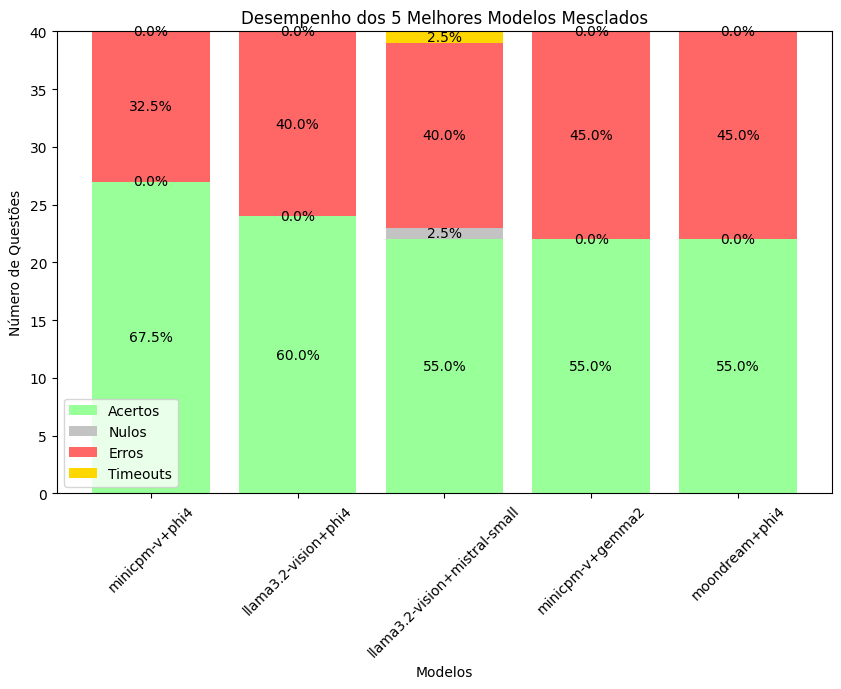

In [27]:
best_text_models = ["mistral-small", "qwen2.5:7b", "mistral-nemo", "gemma2", "mistral", "phi4"]

example_context_questions = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", context_questions)), 25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", context_questions)),25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", context_questions)),25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", context_questions)),25))[:10]
)

# mix_models_context_result = test_models(
#     primary_models=best_text_models,
#     secundary_models=visions_models,
#     questions=example_context_questions
# )

mix_models_test_table = utils.test_table(
    models=utils.gen_modelos_str(primary_models=best_text_models, secundary_models=visions_models),
    questions=context_questions
)

clear_output(wait=True)
display(utils.format_test_table(mix_models_test_table))
plots.model_performance(mix_models_test_table.head(5), "Desempenho dos 5 Melhores Modelos Mesclados")

mix_models_test_table["Acc"].describe()

Em geral tivemos um desempenho muito superior ao teste com apenas modelos de visão computacional, com o 25% chegando a uma acurácia de 40. Em geral, não houve uma variação muito grande nos resultados, e a acurácia máxima que chegamos foi de 67.5%.

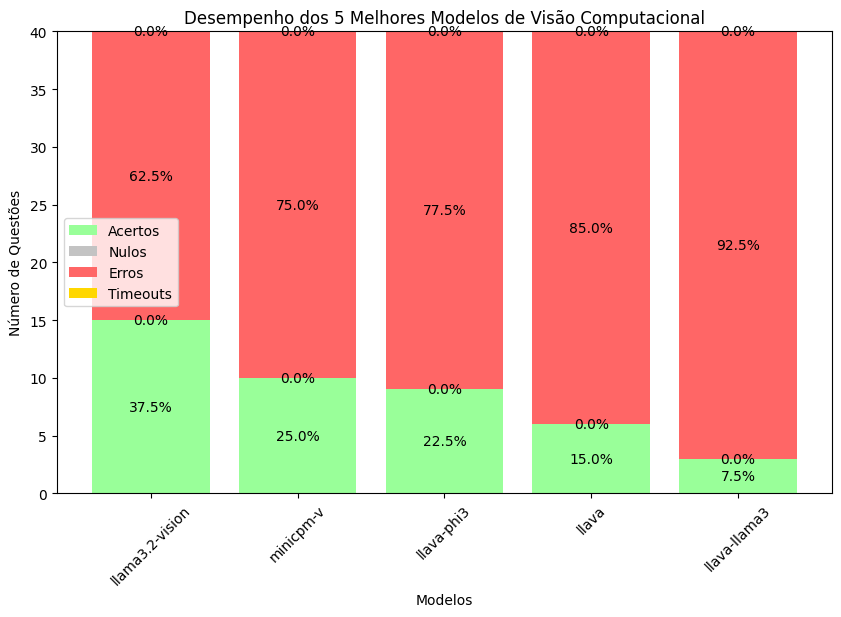

In [28]:
vision_models_test_table_example = utils.test_table(
    models=visions_models,
    questions=example_context_questions
)
plots.model_performance(vision_models_test_table_example.head(5), "Desempenho dos 5 Melhores Modelos de Visão Computacional")
None

Comparando as mesmas qustões com os modelos de apenas visão computacional, nota-se que de fato, houve uma melhora significativa.

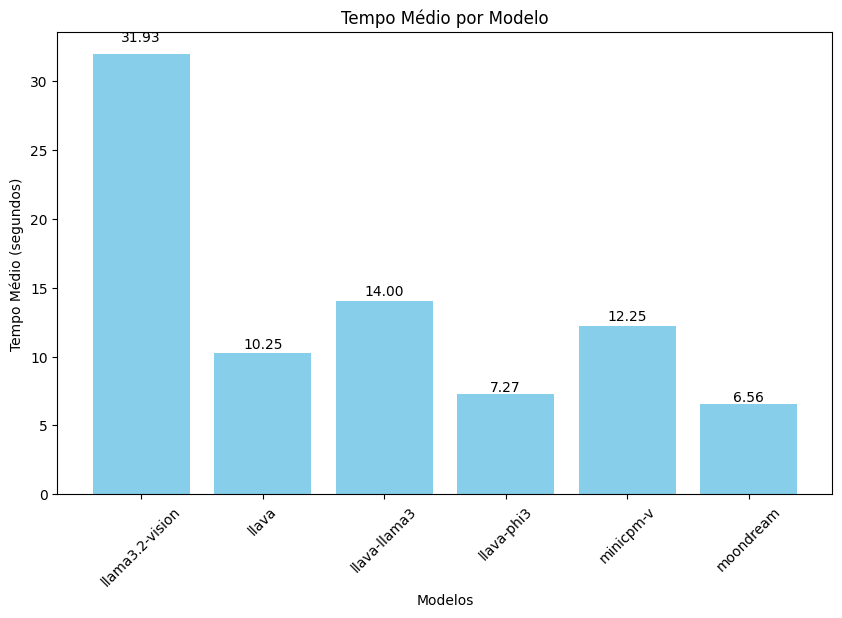

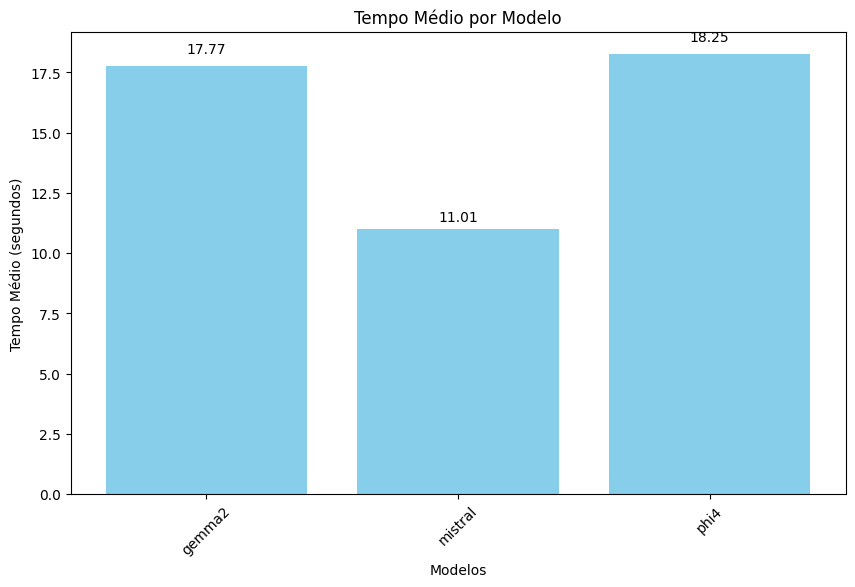

In [29]:
plots.multi_model_performance(
    group='model_vision',
    y_axis='time-avg',
    questions=example_context_questions,
    vision_models=visions_models,
    text_models=best_text_models
)

plots.multi_model_performance(
    group='model_text',
    y_axis='time-avg',
    questions=example_context_questions,
    vision_models=visions_models,
    text_models=best_text_models
)
#TODO: Ajustar o plot para acurácia e por modelo de textos

None

## 4. Questões com Imagens nas Alternativas

Temos um deafio ainda maior comparado com os anteriores, pois neste novo desafio, as alternativas estarão em formato de imagem, o que exige uma precisão maior de interpretação de como é a imagem, podendo ter questões muito complexa, primeiramente iremos explorar 2 tipos de questões presentes, e depois iremos testar com apenas modelos de visão, depois mesclaremos os modelos.


### 4.1 Exemplo de Questões 

##### Questão 21 da Prova de 2009

Os seres vivos apresentam diferentes ciclos de vida, caracterizados pelas fases nas quais gametas são produzidos e pelos processos reprodutivos que resultam na geração de novos indivíduos.

(A) |![Alternativa A](./questoes/alternative_images\2009021-A.png)

(B) |![Alternativa B](./questoes/alternative_images\2009021-B.png)

(C) |![Alternativa C](./questoes/alternative_images\2009021-C.png)

(D) |![Alternativa D](./questoes/alternative_images\2009021-D.png)

(E) | ![Alternativa E](./questoes/alternative_images\2009021-E.png)

| Resposta: C

Nessa questão notamos que a complexidade para essa questão é compreender o texto e também o diagrama, talvez o maior desafio do modelo é conseguir interpretar o funcionamento do diagrama.

##### Questão 91 da Prova de 2009

Os melhores críticos da cultura brasileira trataram-na sempre no plural, isto é, enfatizando a coexistência no Brasil de diversas culturas. Arthur Ramos distingue as culturas não europeias (indígenas, negras) das europeias (portuguesa, italiana, alemã etc.), e Darcy Ribeiro fala de diversos Brasis: crioulo, caboclo, sertanejo, caipira e de Brasis sulinos, a cada um deles correspondendo uma cultura específica.

MORAIS, F. **O Brasil na visão do artista: o país e sua cultura.**  
São Paulo: Sudameris, 2003.

(A)
![Alternativa A](./questoes/alternative_images\2009091-A.png)

(B)
![Alternativa B](./questoes/alternative_images\2009091-B.png)

(C)
![Alternativa C](./questoes/alternative_images\2009091-C.png)

(D)
![Alternativa D](./questoes/alternative_images\2009091-D.png)

(E)
![Alternativa E](./questoes/alternative_images\2009091-E.png)

| Resposta: A

Essa questão têm uma complexidade de interpretar a imagem, e ainda possui várias imagens abstratas, o que pode impactar significativamente no desempenho dos modelos, esse exemplo é bem mais complexo que o anterior.

### 4.2 Apenas Modelos de Visão

A nível de comparação, novamente iremos utilizar apenas modelos de visão computacional e avaliar o seu desempenho. Para esse teste iremos ter que remover o **ollama3.2-vision**, embora nos testes individuiais foi o melhor modelo, o modelo não suporta mais de uma imagem por requisição.

Nesse teste iremos utilizat todas as questões desse formato, pois temos apenas 61 questões

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,minicpm-v,5.5,61 (100.0%),6,0,55,0,0.098361,01:58,01:58,0.00,1.94,7.37,1.41
1,moondream,1.7,61 (100.0%),0,0,61,0,0.000000,01:08,01:08,0.00,1.12,4.57,1.02
2,llava-phi3,2.9,61 (100.0%),0,0,61,0,0.000000,03:06,03:06,0.00,3.06,11.77,2.12
3,TOTAL,10.1,183 (100.0%),6,0,177,0,0.032787,06:13,0.00,ND,2.04,11.77,1.02


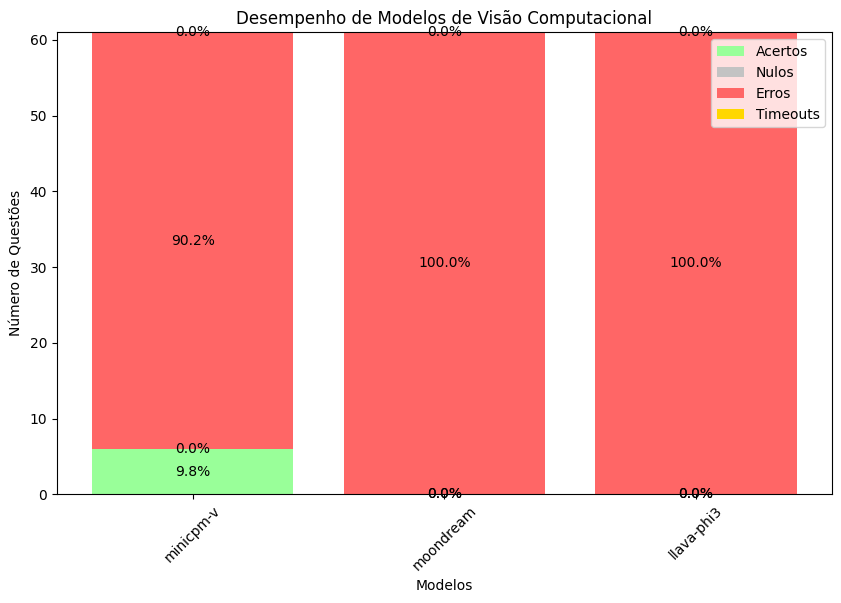

In [32]:
answer_questions = list(filter(lambda x :x['type'] == 'answer-image', questoes))

# test_models(
#     models = ["moondream", "minicpm-v", "llava-phi3"], # o llama3.2-vision não suporta mais de uma imagem
#     questions = answer_questions,
#     predict_file = "./predict_data/answ-vision.json"
# )

answer_questions_table_vision = utils.test_table(
    questions=answer_questions,
    models= ["moondream", "minicpm-v", "llava-phi3"]
)

clear_output(wait=True)
display(utils.format_test_table(answer_questions_table_vision))
plots.model_performance(answer_questions_table_vision, "Desempenho de Modelos de Visão Computacional")
None

Notamos um desempenho ainda mais baixo do que o anterior, com apenas um modelo conseguindo acertar alguma questão, e mesmo assim, não conseguindo uma acurácia de nem 10%, mostrando o quão complexo se tornou esse desafio.

### 4.3 Mistura de Modelos

Então novamente iemos utilizar o recurso que utilizamos na etapa 3, e vamos incluir outro modelo no mesmo esquema de etapa 3.2. Dessa vez iremos utilizar apenas os modelos **phi4** que entregou um melhor resultado, e **gemma2**, que conseguiu entregar um resultado satisfatório, sendo mais leve e mais rápido.


,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,minicpm-v+gemma2,10.9,61 (100.0%),14,0,47,0,0.229508,01:45,01:45,0.00,1.72,8.52,0.27
1,llama3.2-vision+gemma2,13.3,61 (100.0%),11,0,50,0,0.180328,01:41,01:41,0.00,1.67,9.11,0.27
2,minicpm-v+phi4,14.6,61 (100.0%),11,0,50,0,0.180328,10:31,10:31,0.00,10.35,25.40,2.12
3,moondream+gemma2,7.1,61 (100.0%),11,0,50,0,0.180328,01:57,01:57,0.00,1.93,8.81,0.27
4,moondream+phi4,10.8,61 (100.0%),10,0,51,0,0.163934,10:52,10:52,0.00,10.69,25.77,2.56
5,llama3.2-vision+phi4,17.0,61 (100.0%),9,0,52,0,0.147541,11:17,11:17,0.00,11.10,26.76,2.26
6,TOTAL,73.7,366 (100.0%),66,0,300,0,0.180328,38:05,0.00,ND,6.24,26.76,0.27


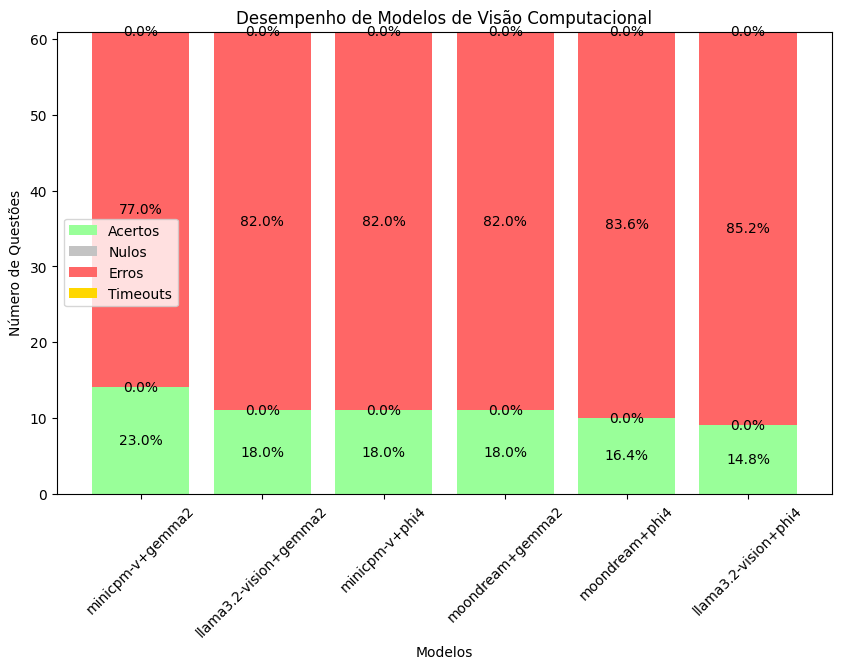

In [33]:

# test_models(
#     primary_models = ['phi4', 'gemma2'],
#     secundary_models= ["llama3.2-vision", "moondream", "minicpm-v"],
#     questions=answer_questions,
# )

answer_questions_table_mix = utils.test_table(
    questions=answer_questions,
    models= utils.gen_modelos_str(
        primary_models= ['phi4', 'gemma2'], 
        secundary_models= ["llama3.2-vision", "moondream", "minicpm-v"]
    )
)


clear_output(wait=True)
display(utils.format_test_table(answer_questions_table_mix))
plots.model_performance(answer_questions_table_mix, "Desempenho de Modelos de Visão Computacional")
None

Conseguimos um desempenho maior, porém baixo, não chegando a nem 23% no melhor caso, a questão que apresentamos, por exemplo, nenhum modelo conseguiu, nem mesmo mesclando os modelos, eles forma capazes de acertar essa questão.

## 5. Questões com imagens no contexto e nas alternativas

Por fim, nosso último desafio, o mais complexo deles, agora devemos interpretar a imagem e as alternativas. A expectativa que tenhamos um resultado ainda mais baixo que que a forma anterior, que já foi extremamente baixa.


### 5.1 Exemplo de Questões Full-Image


Em Florença, Itália, na Igreja de Santa Croce, é possível encontrar um portão em que aparecem os anéis de Borromeo. Alguns historiadores acreditavam que os círculos representavam as três artes: escultura, pintura e arquitetura, pois elas eram tão próximas quanto inseparáveis.

![Imagem Contexto](./questoes/context_images\2009149.jpg)

(A)
![Alternativa A](./questoes/alternative_images\2009149-A.jpg)

(B)
![Alternativa B](./questoes/alternative_images\2009149-B.jpg)

(C)
![Alternativa C](./questoes/alternative_images\2009149-C.jpg)

(D)
![Alternativa D](./questoes/alternative_images\2009149-D.jpg)

(E)
![Alternativa E](./questoes/alternative_images\2009149-E.jpg)

| Resposta: E

### 5.2 Modelos de Visão

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,minicpm-v,5.5,61 (100.0%),6,0,55,0,0.098361,01:58,01:58,0.00,1.94,7.37,1.41
1,moondream,1.7,61 (100.0%),0,0,61,0,0.000000,01:08,01:08,0.00,1.12,4.57,1.02
2,llava-phi3,2.9,61 (100.0%),0,0,61,0,0.000000,03:06,03:06,0.00,3.06,11.77,2.12
3,TOTAL,10.1,183 (100.0%),6,0,177,0,0.032787,06:13,0.00,ND,2.04,11.77,1.02


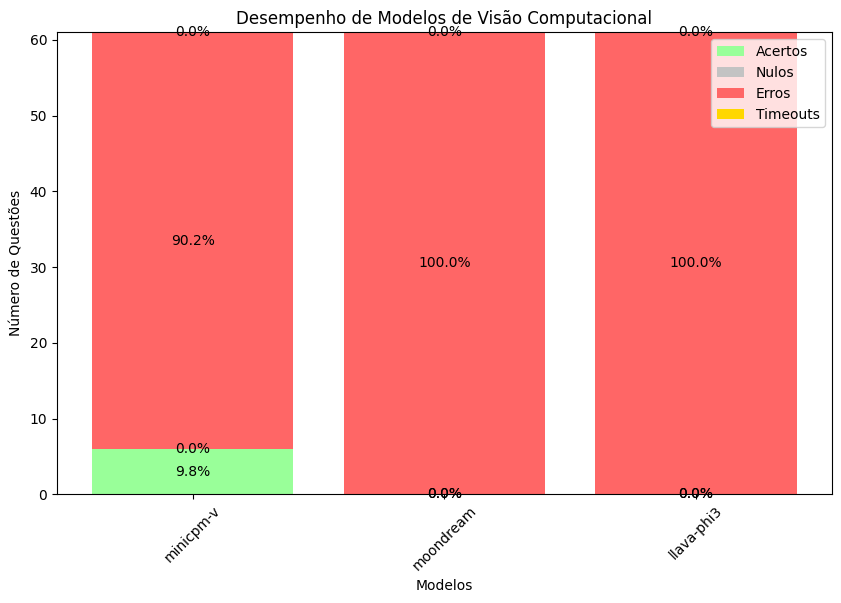

In [36]:
full_image_questions = list(filter(lambda x :x['type'] == 'full-image', questoes))

full_questions_table_vision = utils.test_table(
    questions=answer_questions,
    models= ["moondream", "minicpm-v", "llava-phi3"]
)

clear_output(wait=True)
display(utils.format_test_table(full_questions_table_vision))
plots.model_performance(full_questions_table_vision, "Desempenho de Modelos de Visão Computacional")
None

### 5.3 Modelos Combinados

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,minicpm-v+gemma2,10.9,61 (100.0%),14,0,47,0,0.229508,01:45,01:45,0.00,1.72,8.52,0.27
1,llama3.2-vision+gemma2,13.3,61 (100.0%),11,0,50,0,0.180328,01:41,01:41,0.00,1.67,9.11,0.27
2,minicpm-v+phi4,14.6,61 (100.0%),11,0,50,0,0.180328,10:31,10:31,0.00,10.35,25.40,2.12
3,moondream+gemma2,7.1,61 (100.0%),11,0,50,0,0.180328,01:57,01:57,0.00,1.93,8.81,0.27
4,moondream+phi4,10.8,61 (100.0%),10,0,51,0,0.163934,10:52,10:52,0.00,10.69,25.77,2.56
5,llama3.2-vision+phi4,17.0,61 (100.0%),9,0,52,0,0.147541,11:17,11:17,0.00,11.10,26.76,2.26
6,TOTAL,73.7,366 (100.0%),66,0,300,0,0.180328,38:05,0.00,ND,6.24,26.76,0.27


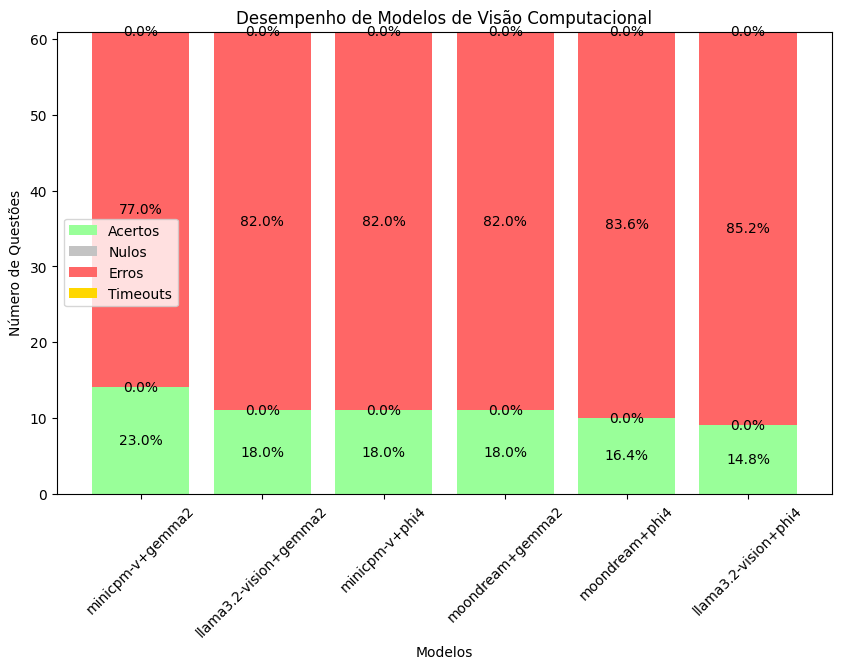

In [37]:
full_questions_table_mix = utils.test_table(
    questions=answer_questions,
    models= utils.gen_modelos_str(
        primary_models= ['phi4', 'gemma2'], 
        secundary_models= ["llama3.2-vision", "moondream", "minicpm-v"]
    )
)

clear_output(wait=True)
display(utils.format_test_table(full_questions_table_mix))
plots.model_performance(full_questions_table_mix, "Desempenho de Modelos de Visão Computacional")
None